This notebook encompasses the analysis of data provided by Dr. Alessandro Cuoco in his work available at the following URL: https://arxiv.org/abs/2002.02466. Initially, the data extraction process will be outlined, followed by an exploration of suitable binning strategies to optimize the representation of the data's inherent properties. Please ensure that you include the file path to ```list_2G_HLVIK.txt``` as part of your contributions.

Number of BHNS events: 17175
Number of BBH events: 18824
Number of BNS events: 1875


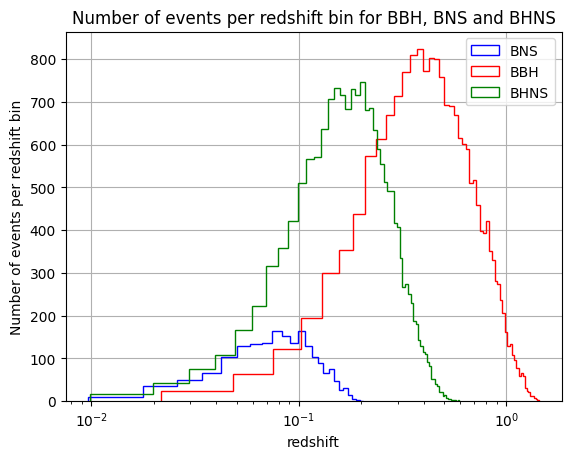

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
#Here the file path should be chnaged to  correspond to the users requirments
file_path = "users/path/to/dataset/file"
data = np.loadtxt(file_path)
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]
#print(length_of_data)

# we transpose the matrix 
file_content = np.loadtxt(file_path).T
type_column = file_content[1].astype(int)
redshift_column = file_content[4]
# print(type_column)
# print(redshift_column)

#In the data set it was denoted as type 1,2, and 3 so we need to identify each type
#BNS are type 1
#BBH are type 3 (see event 6 and the corresponding masses)
#BHNS are type 2

data_bns_redshifts = []
data_bbh_redshifts = []
data_bhns_redshifts = []

for i in range(len(type_column)-1):
    if type_column[i] == 1:
        data_bns_redshifts.append(redshift_column[i])
    elif type_column[i] == 3:
        data_bbh_redshifts.append(redshift_column[i])
    elif type_column[i] == 2:
        data_bhns_redshifts.append(redshift_column[i])
    else:
        pass

print("Number of BHNS events:",len(data_bhns_redshifts))
print("Number of BBH events:",len(data_bbh_redshifts))
print("Number of BNS events:",len(data_bns_redshifts))

#Set the total number of events 
total_bbh = len(data_bbh_redshifts)
total_bhns = len(data_bhns_redshifts)
total_bns = len(data_bns_redshifts)
#Here the code for the joint histogtrams is provided, and the redshift axis is in log scale
hist_bns = plt.hist(data_bns_redshifts,bins='auto',histtype='step',color="blue",label= 'BNS')
#plt.title('BNS')
plt.xscale('log')
plt.xlabel('redshift')
plt.ylabel('Number of events per redshift bin')
plt.grid()
plt.legend()

hist_bhns= plt.hist(data_bbh_redshifts,bins='auto',histtype='step',color="red",label= 'BBH')
#plt.title('BNS'))
plt.xscale('log')
plt.xlabel('redshift')
plt.ylabel('Number of events per redshift bin')
plt.grid()
plt.legend()

hist_bhns = plt.hist(data_bhns_redshifts,bins='auto',histtype='step',color="green",label= 'BHNS')
#plt.title('BNS'))
plt.title('Number of events per redshift bin for BBH, BNS and BHNS')
plt.xscale('log')
plt.xlabel('redshift')
plt.ylabel('Number of events per redshift bin')
plt.grid()
plt.legend()

plt.show()

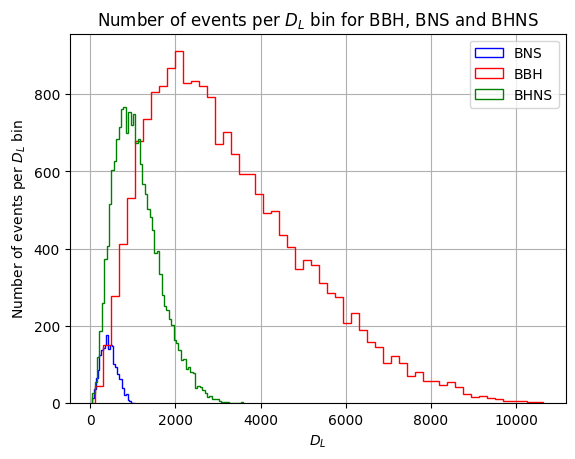

In [2]:
# we will now drive the same plots in D_L space, we use the 2018 Plack values for Omega_matter, H_0 
Omega_matter = 0.315
#The followign result is in Mpc^(-1)
c_over_H0 = 4451.04
from scipy.integrate import quad
#firstly we need to calculate the integral in the the D_L formula, so we define the the integrand
def integrand(z):
    return 1/np.sqrt(Omega_matter*(1+z)**3+(1-Omega_matter))

#Create the matrices to include the D_L for each type of mergers
data_bns_dL=[]
for i in range(len(data_bns_redshifts)-1):
    integration = quad(integrand,0,data_bns_redshifts[i])
    data_bns_dL.append(integration[0]*(1+data_bns_redshifts[i])*c_over_H0)

data_bhns_dL=[]
for i in range(len(data_bhns_redshifts)-1):
    integration = quad(integrand,0,data_bhns_redshifts[i])
    data_bhns_dL.append(integration[0]*(1+data_bhns_redshifts[i])*c_over_H0)

data_bbh_dL=[]
for i in range(len(data_bbh_redshifts)-1):
    integration = quad(integrand,0,data_bbh_redshifts[i])
    data_bbh_dL.append(integration[0]*(1+data_bbh_redshifts[i])*c_over_H0)


# Plot the results in D_L space with automatic bins
hist_bns_dl = plt.hist(data_bns_dL,bins='auto',histtype='step',color="blue",label= 'BNS')
#plt.title('BNS')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

hist_bbh_dl = plt.hist(data_bbh_dL,bins='auto',histtype='step',color="red",label= 'BBH')
#plt.title('BBH')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

hist_bhns_dl = plt.hist(data_bhns_dL,bins='auto',histtype='step',color="green",label= 'BHNS')
plt.title('Number of events per $D_L$ bin for BBH, BNS and BHNS')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

plt.show()


We are using the well-known formula for $d_L = \frac{c}{H_0}\times (1+z) \int_{0}^{z}dz'\frac{1}{(\Omega_m(1+z')^3 + (1 - \Omega_m))^{1/2}}$

At this juncture, it was deemed essential to explore various binning methodologies offered by the ```matplotlib``` library. While considering alternative approaches was valuable, we prioritize showcasing our selected approach. Specifically, we have opted to develop custom code to implement the Friedman-Diaconis rule (FD rule). This code has been designed for seamless applicability to any dataset of interest.

190.23179430066864
56.37282357620559
42.20789160590647
64
56
25


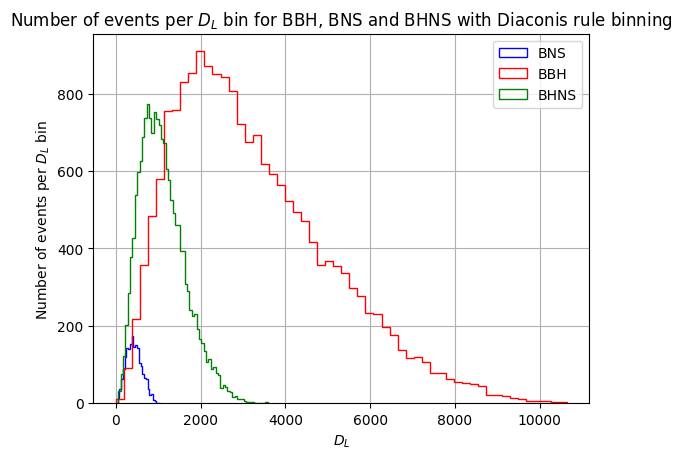

In [3]:
# Lets write our own code for the FD rule bin and compare it with the one given by astropy

max_values_data_bbh_dL = np.max(data_bbh_dL)
max_values_data_bhns_dL = np.max(data_bhns_dL)
max_values_data_bns_dL = np.max(data_bns_dL)

#iqr calculation 
#bbh
q1_bbh_dl, q3_bbh_dl = np.percentile(data_bbh_dL,[25,75])
iqr_bbh_dl = q3_bbh_dl-q1_bbh_dl
#bhns
q1_bhns_dl, q3_bhns_dl = np.percentile(data_bhns_dL,[25,75])
iqr_bhns_dl = q3_bhns_dl-q1_bhns_dl
#bns
q1_bns_dl, q3_bns_dl = np.percentile(data_bns_dL,[25,75])
iqr_bns_dl = q3_bns_dl-q1_bns_dl

#final bin result
fd_bin_bbh_dl = 2*iqr_bbh_dl/len(data_bbh_dL)**(1/3)
print(fd_bin_bbh_dl)

fd_bin_bhns_dl = 2*iqr_bhns_dl/len(data_bhns_dL)**(1/3)
print(fd_bin_bhns_dl)

fd_bin_bns_dl = 2*iqr_bns_dl/len(data_bns_dL)**(1/3)
print(fd_bin_bns_dl)

# Rounding the numbers
number_of_bins_bhns_dl = round(max_values_data_bhns_dL/fd_bin_bhns_dl)
print(number_of_bins_bhns_dl)

number_of_bins_bbh_dl = round(max_values_data_bbh_dL/fd_bin_bbh_dl)
print(number_of_bins_bbh_dl)

number_of_bins_bns_dl = round(max_values_data_bns_dL/fd_bin_bns_dl)
print(number_of_bins_bns_dl)

# Plot the results in D_L space for FD rule
hist_bns_dl = plt.hist(data_bns_dL,bins= number_of_bins_bns_dl,histtype='step',color="blue",label= 'BNS',range=(0,max_values_data_bns_dL))
#plt.title('BNS')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

hist_bbh_dl = plt.hist(data_bbh_dL,bins=number_of_bins_bbh_dl,histtype='step',color="red",label= 'BBH',range=(0,max_values_data_bbh_dL))
#plt.title('BBH')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

hist_bhns_dl = plt.hist(data_bhns_dL,bins=number_of_bins_bhns_dl,histtype='step',color="green",label= 'BHNS',range=(0,max_values_data_bhns_dL))
plt.title('Number of events per $D_L$ bin for BBH, BNS and BHNS with Diaconis rule binning')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin ')
plt.grid()
plt.legend()

plt.show()


The subsequent phase of our analysis involves determining the midpoint of each edge, extracting the data points, and then fitting them to the assumed functional form, which can be expressed as follows: $a x^b \times \exp(-(c \times x))^d$. This assumption is grounded in the expectation of a consistent functional behavior in the distribution of galaxies, as derived from both EUCLID observations and theoretical considerations linked to star formation rates and the rate of gravitational wave (GW) events. For a more comprehensive exploration of these arguments, please refer to the following source: https://arxiv.org/abs/1605.01405. This fitting process will be applied to the various types of mergers under investigation.

/tmp/ipykernel_6321/2016947385.py:26: RuntimeWarning: invalid value encountered in power
  y = a*x_data**b*np.exp(-(c*x_data)**d)


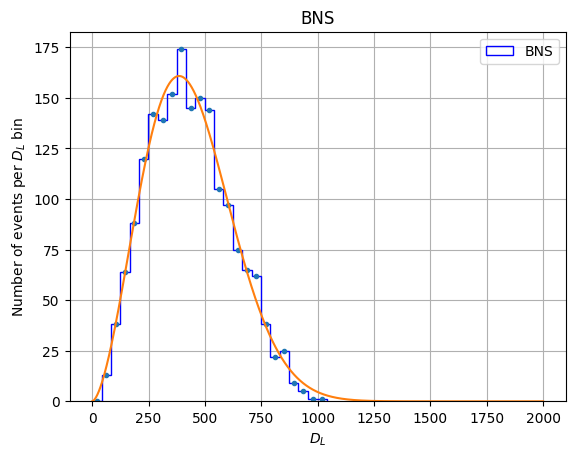

In [4]:
max_values_data_bns_dL = np.max(data_bns_dL)
max_values_data_bhns_dL = np.max(data_bhns_dL)
max_values_data_bbh_dL = np.max(data_bbh_dL)
min_values_data_bbh_dL = np.min(data_bbh_dL)
min_values_data_bhns_dL = np.min(data_bhns_dL)
min_values_data_bns_dL = np.min(data_bns_dL)

max_array = [max_values_data_bbh_dL, max_values_data_bhns_dL, max_values_data_bns_dL]

space = np.linspace(0, 6000, 100000)

#Fitting BNS

a_histogram_bns_dl = np.histogram(data_bns_dL,bins= round(number_of_bins_bns_dl), range=(0,max_values_data_bns_dL))

#Extraction of the points in the middle of the bins
tops_bns = a_histogram_bns_dl[0] #y_data
bin_edges_bns =  a_histogram_bns_dl[1] #x_data
bin_centres_bns = list()
for i in range(len(tops_bns)):
    bin_centre_bns = (bin_edges_bns[i]+bin_edges_bns[i+1])/2
    bin_centres_bns.append(bin_centre_bns)

#Fitting the equation to the data points
def fitting_equation(x_data,a,b,c,d):
    y = a*x_data**b*np.exp(-(c*x_data)**d)
    return y

#plt.plot(bin_centres_bns,tops_bns)
p01 = [200, 2, 0.01, 1]
fitting_params_bns, cov_matrix_bns = scipy.optimize.curve_fit(fitting_equation, bin_centres_bns,tops_bns, p0 = p01)
y_output_bns =  fitting_equation(np.array(bin_centres_bns),a = fitting_params_bns[0], b = fitting_params_bns[1], c = fitting_params_bns[2], d = fitting_params_bns[3])

#Joint plot of The histogram, the middle points of the bins and the fitted function
hist_bns_dl = plt.hist(data_bns_dL,bins= round(number_of_bins_bns_dl),histtype='step',color="blue",label= 'BNS',range=(0,max_values_data_bns_dL))
plt.title('BNS')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

def n_bns(d_L):
    return(fitting_params_bns[0]*d_L**fitting_params_bns[1]*np.exp(-(fitting_params_bns[2]*d_L)**fitting_params_bns[3]))



plt.plot(bin_centres_bns,tops_bns,'.')
#plt.plot(bin_centres_bns,y_output_bns)
space_bns = np.linspace(0, 2000, 100000)
plt.plot(space_bns,n_bns(space_bns))




64


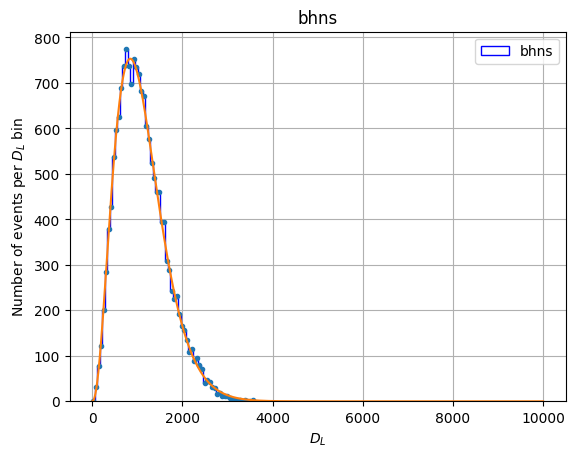

In [5]:
#Fitting bhns

print(round(number_of_bins_bhns_dl))

a_histogram_bhns_dl = np.histogram(data_bhns_dL,bins= round(number_of_bins_bhns_dl), range=(0,max_values_data_bhns_dL))

#Extraction of the points in the middle of the bins
tops_bhns = a_histogram_bhns_dl[0] #y_data
bin_edges_bhns =  a_histogram_bhns_dl[1] #x_data
bin_centres_bhns = list()
for i in range(len(tops_bhns)):
    bin_centre_bhns = (bin_edges_bhns[i]+bin_edges_bhns[i+1])/2
    bin_centres_bhns.append(bin_centre_bhns)

#Fitting the equation to the data points
def fitting_equation(x_data,a,b,c,d):
    y = a*x_data**b*np.exp(-(c*x_data)**d)
    return y

#plt.plot(bin_centres_bhns,tops_bhns)
p01 = [200, 2, 0.01, 1]
fitting_params_bhns, cov_matrix_bhns = scipy.optimize.curve_fit(fitting_equation, bin_centres_bhns,tops_bhns,p0 = p01)
y_output_bhns =  fitting_equation(np.array(bin_centres_bhns),a = fitting_params_bhns[0], b = fitting_params_bhns[1], c = fitting_params_bhns[2], d = fitting_params_bhns[3])

#Joint plot of The histogram, the middle points of the bins and the fitted function
hist_bhns_dl = plt.hist(data_bhns_dL,bins= round(number_of_bins_bhns_dl),histtype='step',color="blue",label= 'bhns',range=(0,max_values_data_bhns_dL))
plt.title('bhns')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

def n_bhns(d_L):
    return(fitting_params_bhns[0]*d_L**fitting_params_bhns[1]*np.exp(-(fitting_params_bhns[2]*d_L)**fitting_params_bhns[3]))



plt.plot(bin_centres_bhns,tops_bhns,'.')
#plt.plot(bin_centres_bhns,y_output_bhns)
space_bhns = np.linspace(0, 10000, 100000)
plt.plot(space_bhns,n_bhns(space_bhns))

/tmp/ipykernel_6321/4124662368.py:15: RuntimeWarning: invalid value encountered in power
  y = a*x_data**b*np.exp(-(c*x_data)**d)


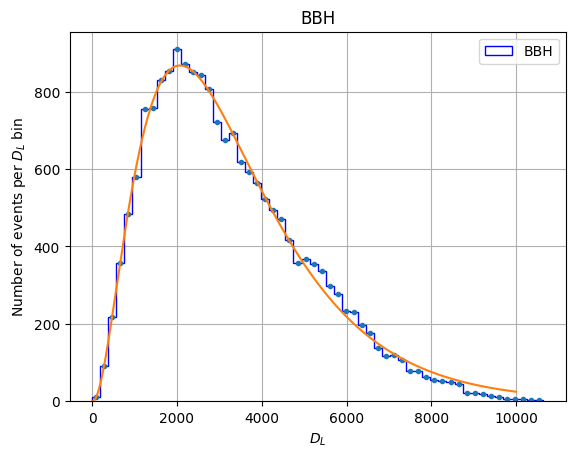

In [37]:
#Fitting bbh

a_histogram_bbh_dl = np.histogram(data_bbh_dL,bins= round(number_of_bins_bbh_dl), range=(0,max_values_data_bbh_dL))

#Extraction of the points in the middle of the bins
tops_bbh = a_histogram_bbh_dl[0] #y_data
bin_edges_bbh =  a_histogram_bbh_dl[1] #x_data
bin_centres_bbh = list()
for i in range(len(tops_bbh)):
    bin_centre_bbh = (bin_edges_bbh[i]+bin_edges_bbh[i+1])/2
    bin_centres_bbh.append(bin_centre_bbh)

#Fitting the equation to the data points
def fitting_equation(x_data,a,b,c,d):
    y = a*x_data**b*np.exp(-(c*x_data)**d)
    return y

#plt.plot(bin_centres_bbh,tops_bbh)
p01 = [200, 2, 0.01, 1]
fitting_params_bbh, cov_matrix_bbh = scipy.optimize.curve_fit(fitting_equation, bin_centres_bbh,tops_bbh, p0 = p01)
y_output_bbh =  fitting_equation(np.array(bin_centres_bbh),a = fitting_params_bbh[0], b = fitting_params_bbh[1], c = fitting_params_bbh[2], d = fitting_params_bbh[3])

#Joint plot of The histogram, the middle points of the bins and the fitted function
hist_bbh_dl = plt.hist(data_bbh_dL,bins= round(number_of_bins_bbh_dl),histtype='step',color="blue",label= 'BBH',range=(0,max_values_data_bbh_dL))
plt.title('BBH')
#plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.grid()
plt.legend()

def n_bbh(d_L):
    return(fitting_params_bbh[0]*d_L**fitting_params_bbh[1]*np.exp(-(fitting_params_bbh[2]*d_L)**fitting_params_bbh[3]))



plt.plot(bin_centres_bbh,tops_bbh,'.')
#plt.plot(bin_centres_bbh,y_output_bbh)
space_bbh = np.linspace(0, 10000, 100000)
plt.plot(space_bbh,n_bbh(space_bbh))


In order to present to present all the mergers we have:

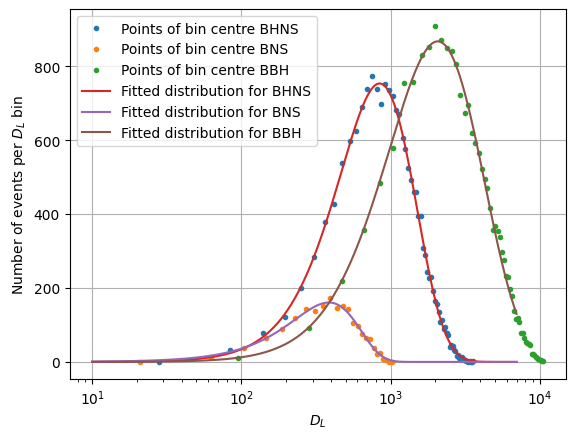

In [7]:
#Final Fitting plot
#The spacing should change such that the properties are obvious
spacej = np.linspace(10,7000, 100000)
plt.plot(bin_centres_bhns,tops_bhns,'.', label = "Points of bin centre BHNS")
plt.plot(bin_centres_bns,tops_bns,'.', label = "Points of bin centre BNS")
plt.plot(bin_centres_bbh,tops_bbh,'.', label = "Points of bin centre BBH")
plt.plot(spacej,n_bhns(spacej), label = "Fitted distribution for BHNS")
plt.plot(spacej,n_bns(spacej), label = "Fitted distribution for BNS")
plt.plot(spacej,n_bbh(spacej), label = "Fitted distribution for BBH")
plt.xscale('log')
plt.xlabel('$D_L$')
plt.ylabel('Number of events per $D_L$ bin')
plt.legend()
plt.grid()

In [8]:
#Print of the d_L s
print('a for BBH is', fitting_params_bbh[0])
print('b for BBH is', fitting_params_bbh[1])
print('c for BBH is', fitting_params_bbh[2])
print('d for BBH is', fitting_params_bbh[3])
print('\n')
print('a for BNS is', fitting_params_bns[0])
print('b for BNS is', fitting_params_bns[1])
print('c for BNS is', fitting_params_bns[2])
print('d for BNS is', fitting_params_bns[3])
print('\n')
print('a for BHNS is', fitting_params_bhns[0])
print('b for BHNS is', fitting_params_bhns[1])
print('c for BHNS is', fitting_params_bhns[2])
print('d for BHNS is', fitting_params_bhns[3])

#Define the parameters

a_bbh = fitting_params_bbh[0]
b_bbh = fitting_params_bbh[1]
c_bbh = fitting_params_bbh[2]
d_bbh = fitting_params_bbh[3]

a_bns = fitting_params_bns[0]
b_bns = fitting_params_bns[1]
c_bns = fitting_params_bns[2]
d_bns = fitting_params_bns[3]

a_bhns = fitting_params_bhns[0]
b_bhns = fitting_params_bhns[1]
c_bhns = fitting_params_bhns[2]
d_bhns = fitting_params_bhns[3]

a for BBH is 0.0005450103278744837
b for BBH is 2.2341373221688468
c for BBH is 0.0017225215782462997
d for BBH is 0.8037448246377223


a for BNS is 0.018666690313326073
b for BNS is 1.651888198166992
c for BNS is 0.002301500882264538
d for BNS is 2.130355817727089


a for BHNS is 0.0013262997767959181
b for BHNS is 2.2338018043873773
c for BHNS is 0.0019060601427432775
d for BHNS is 1.238451891110231


The subsequent code blocks are designed with flexibility in mind, allowing for adjustments to our binning approach while ensuring that the number of events aligns with the integral of the resulting function, denoted as $n_{GW}(d_L)$. It is worth noting that to achieve the desired outcome, we must intentionally introduce an entirely irrational change in the binning strategy. Consequently, we will persist with the use of the Friedman-Diaconis (FD) rule, perform the fitting process, and subsequently normalize the function. This normalization ensures that the integral of $n_{GW}(d_L)$ over the $d_L$ space equates to the total number of events. Although this aspect is not directly pertinent to our specific objectives, it may prove valuable for other users. Please be aware that this section is currently commented out.

In [9]:
# #Fitting BNS

# bin_number_bns = len(data_bns_dL)-829
# a_histogram_bns_dl = np.histogram(data_bns_dL,bins= bin_number_bns, range=(0,max_values_data_bns_dL))

# #Extraction of the points in the middle of the bins
# tops_bns = a_histogram_bns_dl[0] #y_data
# bin_edges_bns =  a_histogram_bns_dl[1] #x_data
# bin_centres_bns = list()
# for i in range(len(tops_bns)):
#     bin_centre_bns = (bin_edges_bns[i]+bin_edges_bns[i+1])/2
#     bin_centres_bns.append(bin_centre_bns)

# #Fitting the equation to the data points
# def fitting_equation(x_data,a,b,c,d):
#     y = a*x_data**b*np.exp(-(c*x_data)**d)
#     return y

# #plt.plot(bin_centres_bns,tops_bns)
# p01 = [200, 2, 0.01, 1]
# fitting_params_bns, cov_matrix_bns = scipy.optimize.curve_fit(fitting_equation, bin_centres_bns,tops_bns, p0 = p01)
# y_output_bns =  fitting_equation(np.array(bin_centres_bns),a = fitting_params_bns[0], b = fitting_params_bns[1], c = fitting_params_bns[2], d = fitting_params_bns[3])

# #Joint plot of The histogram, the middle points of the bins and the fitted function
# hist_bns_dl = plt.hist(data_bns_dL,bins= bin_number_bns,histtype='step',color="blue",label= 'BNS',range=(0,max_values_data_bns_dL))
# plt.title('BNS')
# #plt.xscale('log')
# plt.xlabel('$D_L$')
# plt.ylabel('Number of events per $D_L$ bin')
# plt.grid()
# plt.legend()

# def n_bns(d_L):
#     return(fitting_params_bns[0]*d_L**fitting_params_bns[1]*np.exp(-(fitting_params_bns[2]*d_L)**fitting_params_bns[3]))



# plt.plot(bin_centres_bns,tops_bns,'.')
# #plt.plot(bin_centres_bns,y_output_bns)
# space_bns = np.linspace(0, 2000, 100000)
# plt.plot(space_bns,n_bns(space_bns))

# total_integration_n_bbh , total_integration_n_bbh_err= quad(n_bns,min_values_data_bns_dL,max_values_data_bns_dL)
# print("Integral result",total_integration_n_bbh)
# print("Difference between number of events and integral", len(data_bns_dL)-total_integration_n_bbh)

In this section, the equal area binning method for gravitational wave (GW) events is implemented. It's worth noting that while this approach is included for completeness, it will not be employed in our current analysis. However, for users who wish to conduct a final run in multiprocessing (MP) using this approach, it's important to be mindful of the inherent bias differences between GW and GC (galaxy cluster) events. As a result, we have commented out this code section. If desired, it can be activated by removing the comments.

For users employing Visual Studio Code (vscode), you can easily comment or uncomment all the lines in the notebook by selecting all the lines and then using the keyboard shortcut Ctrl+/. To comment it out again, simply use the same shortcut, Ctrl+/.

In [10]:
# #We continue our analysis by writing an inmplementation of following:
# #We will set a specific number of bins n and each bin width must be choosen 
# #such that each one of the defined are must have the same area.
# #We need to find the minimum values of the data and define these as our ends for the integration
# min_values_data_bbh_dL = np.min(data_bbh_dL)
# min_values_data_bhns_dL = np.min(data_bhns_dL)
# min_values_data_bns_dL = np.min(data_bns_dL)


# #BBH xmin and xmax. I use x argument but it means from now and on d_L
# integration_min = min_values_data_bbh_dL
# integration_max = max_values_data_bbh_dL
# #insert the the values for the a,b,c and d we got from the previous analysis

# a_bbh = fitting_params_bbh[0]
# b_bbh = fitting_params_bbh[1]
# c_bbh = fitting_params_bbh[2]
# d_bbh = fitting_params_bbh[3]

# from scipy import integrate
# from scipy.interpolate import interp1d
# from scipy.interpolate import interp2d

# import scipy.interpolate as intp
# import scipy.optimize as opt

# def func(parameter):
#     return a_bbh*parameter**b_bbh*np.exp(-(c_bbh*parameter)**d_bbh)

# minimum = min_values_data_bbh_dL
# maximum = max_values_data_bbh_dL
# xss_total = 100
# xss = np.linspace(minimum,maximum,xss_total)
# funcv=func(xss)
# intv = integrate.cumulative_trapezoid(funcv,xss, initial=0.0)
# #comparison with the quad integral
# tot_intv = intv[len(intv)-1]
# tot_int, tot_int_err = integrate.quad(func,minimum,maximum,epsrel=1.e-12)
# print("Direct integral value for BBH:", tot_int)
# print("Direct integral error for BBH:", tot_int_err)
# print("Cumulative integral value for BBH", tot_intv)

# #normalize the antiderivative
# intv = intv/tot_intv

# #interpolate the anti derivative
# int_interp = intp.interp1d(xss, intv, kind='linear',fill_value="extrapolate", assume_sorted=True)

# #calculation of the inverse fuction assuming equidistant grid
# #Basically here we choose the number of bins we end up with 
# ys_num = 10

# ys = np.linspace(0,1.0,ys_num, endpoint=False)
# inv_funcv = np.empty(ys.shape, dtype=np.float64)

# def qres(x,y):
#     return (int_interp(x) - y)**2

# for iter in enumerate(ys):
#     opt_res = opt.minimize(qres, x0=xss[0], args = (iter[1]), method='Nelder-Mead', tol=1.e-8)
#     inv_funcv[iter[0]]= opt_res.x[0]

# #print
# print("    y    F^(-1)(y)   for BBH")
# for i in range(len(ys)):
#     print("{0:.10f} {1:.10f}".format(ys[i], inv_funcv[i]))

# fig, ax = plt.subplots(1,2)
# ax[0].plot(xss, intv, 'r.')
# ax[1].plot(ys, inv_funcv, 'k.')

# #calculating the bin width
# bin_width_bbh =[]
# for i in range(ys_num-1):
#     cnt = inv_funcv[i+1]-inv_funcv[i]
#     bin_width_bbh.append(cnt)

# print("The required bin widths for BBH:",bin_width_bbh)

# #Bins 

# bin_bbh =[]
# for i in range(ys_num-1):
#     cnt = inv_funcv[i]
#     bin_bbh.append(cnt)

# print("The required bins for BBH:",bin_bbh)



# ################################################################## BHNS###################################################################################
# #bhns xmin and xmax. I use x argument but it means from now and on d_L
# integration_min = min_values_data_bhns_dL
# integration_max = max_values_data_bhns_dL
# #insert the the values for the a,b,c and d we got from the previous analysis

# a_bhns = fitting_params_bhns[0]
# b_bhns = fitting_params_bhns[1]
# c_bhns = fitting_params_bhns[2]
# d_bhns = fitting_params_bhns[3]

# from scipy import integrate
# from scipy.interpolate import interp1d
# from scipy.interpolate import interp2d

# import scipy.interpolate as intp
# import scipy.optimize as opt

# def func(parameter):
#     return a_bhns*parameter**b_bhns*np.exp(-(c_bhns*parameter)**d_bhns)

# minimum = min_values_data_bhns_dL
# maximum = max_values_data_bhns_dL
# xss_total = 100
# xss = np.linspace(minimum,maximum,xss_total)
# funcv=func(xss)
# intv = integrate.cumulative_trapezoid(funcv,xss, initial=0.0)
# #comparison with the quad integral
# tot_intv = intv[len(intv)-1]
# tot_int, tot_int_err = integrate.quad(func,minimum,maximum,epsrel=1.e-12)
# print("Direct integral value for bhns:", tot_int)
# print("Direct integral error for bhns:", tot_int_err)
# print("Cumulative integral value for bhns", tot_intv)

# #normalize the antiderivative
# intv = intv/tot_intv

# #interpolate the anti derivative
# int_interp = intp.interp1d(xss, intv, kind='linear',fill_value="extrapolate", assume_sorted=True)

# #calculation of the inverse fuction assuming equidistant grid
# #Basically here we choose the number of bins we end up with 
# ys_num = 10

# ys = np.linspace(0,1.0,ys_num, endpoint=False)
# inv_funcv = np.empty(ys.shape, dtype=np.float64)

# def qres(x,y):
#     return (int_interp(x) - y)**2

# for iter in enumerate(ys):
#     opt_res = opt.minimize(qres, x0=xss[0], args = (iter[1]), method='Nelder-Mead', tol=1.e-8)
#     inv_funcv[iter[0]]= opt_res.x[0]

# #print
# print("    y    F^(-1)(y)   for bhns")
# for i in range(len(ys)):
#     print("{0:.10f} {1:.10f}".format(ys[i], inv_funcv[i]))

# fig, ax = plt.subplots(1,2)
# ax[0].plot(xss, intv, 'r.')
# ax[1].plot(ys, inv_funcv, 'k.')

# #calculating the bin width
# bin_width_bhns =[]
# for i in range(ys_num-1):
#     cnt = inv_funcv[i+1]-inv_funcv[i]
#     bin_width_bhns.append(cnt)

# print("The required bin widths for bhns:",bin_width_bhns)

# #Bins 

# bin_bhns =[]
# for i in range(ys_num-1):
#     cnt = inv_funcv[i]
#     bin_bhns.append(cnt)

# print("The required bins for bhns:",bin_bhns)

# ########################################################## BNS ########################################################################################

# #bns xmin and xmax. I use x argument but it means from now and on d_L
# integration_min = min_values_data_bns_dL
# integration_max = max_values_data_bns_dL
# #insert the the values for the a,b,c and d we got from the previous analysis

# a_bns = fitting_params_bns[0]
# b_bns = fitting_params_bns[1]
# c_bns = fitting_params_bns[2]
# d_bns = fitting_params_bns[3]

# from scipy import integrate
# from scipy.interpolate import interp1d
# from scipy.interpolate import interp2d

# import scipy.interpolate as intp
# import scipy.optimize as opt

# def func(parameter):
#     return a_bns*parameter**b_bns*np.exp(-(c_bns*parameter)**d_bns)

# minimum = min_values_data_bns_dL
# maximum = max_values_data_bns_dL
# xss_total = 100
# xss = np.linspace(minimum,maximum,xss_total)
# funcv=func(xss)
# intv = integrate.cumulative_trapezoid(funcv,xss, initial=0.0)
# #comparison with the quad integral
# tot_intv = intv[len(intv)-1]
# tot_int, tot_int_err = integrate.quad(func,minimum,maximum,epsrel=1.e-12)
# print("Direct integral value for bns:", tot_int)
# print("Direct integral error for bns:", tot_int_err)
# print("Cumulative integral value for bns", tot_intv)

# #normalize the antiderivative
# intv = intv/tot_intv

# #interpolate the anti derivative
# int_interp = intp.interp1d(xss, intv, kind='linear',fill_value="extrapolate", assume_sorted=True)

# #calculation of the inverse fuction assuming equidistant grid
# #Basically here we choose the number of bins we end up with 
# ys_num = 10

# ys = np.linspace(0,1.0,ys_num, endpoint=False)
# inv_funcv = np.empty(ys.shape, dtype=np.float64)

# def qres(x,y):
#     return (int_interp(x) - y)**2

# for iter in enumerate(ys):
#     opt_res = opt.minimize(qres, x0=xss[0], args = (iter[1]), method='Nelder-Mead', tol=1.e-8)
#     inv_funcv[iter[0]]= opt_res.x[0]

# #print
# print("    y    F^(-1)(y)   for bns")
# for i in range(len(ys)):
#     print("{0:.10f} {1:.10f}".format(ys[i], inv_funcv[i]))

# fig, ax = plt.subplots(1,2)
# ax[0].plot(xss, intv, 'r.')
# ax[1].plot(ys, inv_funcv, 'k.')

# #calculating the bin width
# bin_width_bns =[]
# for i in range(ys_num-1):
#     cnt = inv_funcv[i+1]-inv_funcv[i]
#     bin_width_bns.append(cnt)

# print("The required bin widths for bns:",bin_width_bns)

# #Bins 

# bin_bns =[]
# for i in range(ys_num-1):
#     cnt = inv_funcv[i]
#     bin_bns.append(cnt)

# print("The required bins for bns:",bin_bns)



We have made a strategic shift in our binning approach, with a focus on aligning the z-edges with the fiducial cosmology. Given that we already possess a binning scheme from EUCLID, defined as \([0.0, 0.418, 0.560, 0.678, 0.789, 0.900, 1.019, 1.155, 1.324, 1.576, 2.5]\), we have opted to maintain this binning structure for all further gravitational wave (GW) events analysis. It is important to note that this choice is grounded in the assumption of \(n(z)\) for galaxy cluster (GC) surveys and \(n(d_L)\) for GW surveys, under the fiducial cosmology. We can establish an equation where we express \(n\) as either \(n(z)\) or \(n(d_L)\), with the aid of the integral:


$\int_{\text{zbin}-1}^{\text{zbin}} n(x)\, dx,$


where $x$ can represent either $z$ or $d_L$, and the bin edges are defined as provided above. This allows us to compute the number of events for each merger, subsequently enabling us to determine the Poisson noise associated with them.

While this approach holds promise, we acknowledge its inherent complexities. Therefore, we have considered an alternative approach by employing the following binning: $[z_{\text{min}}, 0.1, 0.2, 0.3, 0.5, z_{\text{max}}]$, where $z_{\text{min}}$ is set at 0.001 and $z_{\text{max}}$ at 1.0. Another option is to randomly select values within the specified $z$ range and subsequently assess whether the resulting binning aligns with our requirements. It is important to note that the choice of binning does not significantly impact the Markov Chain Monte Carlo (MCMC) analysis; rather, its primary purpose is to facilitate the initial steps of data analysis.


In [11]:
# GW distributions

def n_bhns(d_L):
    return a_bhns*d_L**b_bhns*np.exp(-(c_bhns*d_L)**d_bhns)

def n_bns(d_L):
    return a_bns*d_L**b_bns*np.exp(-(c_bns*d_L)**d_bns)

def n_bbh(d_L):
    return a_bbh*d_L**b_bbh*np.exp(-(c_bbh*d_L)**d_bbh)

zmean = 0.9
z0 = zmean/np.sqrt(2)

def n_gc(redshift):
    return (redshift/z0)**2 * np.exp(-(redshift/z0)**1.5)



# total_bhns = len(data_bhns_redshifts)
# total_bns = len(data_bns_redshifts)
# total_bbh = len(data_bbh_redshifts)

# plt.plot(spacej, n_bbh(spacej), label= 'BBH')
# plt.plot(spacej, n_bhns(spacej), label= 'BHNS')
# plt.plot(spacej, n_bns(spacej), label= 'BNS')
# plt.title("Event distribution with respect to the redshift")
# plt.xlabel(" $d_L$ ")
# plt.ylabel("Number of evnets")
# plt.grid()
# plt.legend()
# plt.xscale('log')




The bins chosen for EUCLID in d_L space [0.0, 472.9578416169917, 1010.9932058564918, 1602.7058754491356, 2922.4328098445485, 6798.337327174517]


Maximum d_L value for BNS: 1039.7326740810822


Maximum d_L value for BHNS: 3583.5057132656366


Maximum d_L value for BBH: 10636.393964177512


3376925.0918124327
78724.05659743708
6


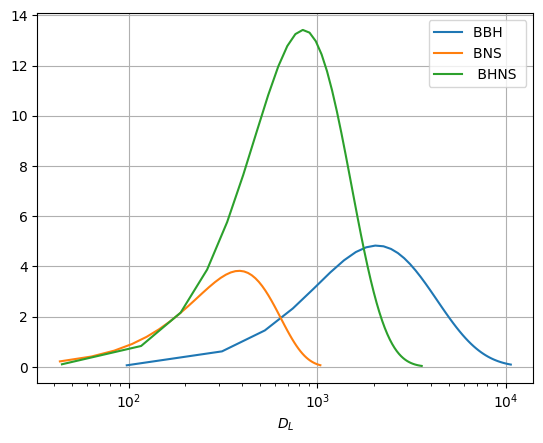

In [12]:
#Obtaining the number of events per bin
from astropy import cosmology as cosmo

zmin  = 0.001
zmax = 1.0
#euclid_bin_z = [zmin, 0.418, 0.560, 0.678, 0.789, 0.900, 1.019, 1.155, 1.324, 1.576, zmax]
euclid_bin_z = [ zmin, 0.1, 0.2, 0.3, 0.5, zmax]
# We could use the astro.luminosity distance but there H0 = 70 km/s/Mpc while we are going to use the Planck 2018 value.
#Create the matrices to include the D_L for each type of mergers
#It is already implemented the calculation of d_L so we need to find the euclid binning in d_L:

euclid_bin_d_l = []

for i in range(len(euclid_bin_z)):
    integration , int_err = quad(integrand,zmin, euclid_bin_z[i])
    euclid_bin_d_l.append(integration*(1+euclid_bin_z[i])*c_over_H0)

print("The bins chosen for EUCLID in d_L space",euclid_bin_d_l)
print('\n')
print("Maximum d_L value for BNS:", max_values_data_bns_dL)
print('\n')
print("Maximum d_L value for BHNS:", max_values_data_bhns_dL)
print('\n')
print("Maximum d_L value for BBH:", max_values_data_bbh_dL)
print('\n')



# #Plot GC and GW distributions
# euclid_space = np.linspace(min(euclid_bin_d_l), max(euclid_bin_d_l))



#The normalization of the fitting functions should be done for the range of the binning we choose in such a way that when we are calculating the fraction that each bin
#contains when it is added is equal with 100%

#Now the GW distributions should be normalized 
#BBH
norm_space_bbh = np.linspace(min_values_data_bbh_dL, max_values_data_bbh_dL)

norm_bbh , norm_bbh_err = quad(n_bbh, euclid_bin_d_l[0], euclid_bin_d_l[len(euclid_bin_d_l)-1] )
print(norm_bbh)
def n_bbh_norm(d_L):
    return a_bbh*d_L**b_bbh*np.exp(-(c_bbh*d_L)**d_bbh)/(norm_bbh/len(data_bbh_dL))


plt.plot(norm_space_bbh,n_bbh_norm(norm_space_bbh),label = "BBH ")


#bns
norm_space_bns = np.linspace(min_values_data_bns_dL, max_values_data_bns_dL)

norm_bns , norm_bns_err = quad(n_bns, euclid_bin_d_l[0], euclid_bin_d_l[len(euclid_bin_d_l)-1] )
print(norm_bns)
def n_bns_norm(d_L):
    return a_bns*d_L**b_bns*np.exp(-(c_bns*d_L)**d_bns)/(norm_bns/len(data_bns_dL))


plt.plot(norm_space_bns,n_bns_norm(norm_space_bns),label = "BNS ")

#bhns
norm_space_bhns = np.linspace(min_values_data_bhns_dL, max_values_data_bhns_dL)

norm_bhns , norm_bhns_err = quad(n_bhns, euclid_bin_d_l[0], euclid_bin_d_l[len(euclid_bin_d_l)-1] )
# plt.xlabel()
def n_bhns_norm(d_L):
    return a_bhns*d_L**b_bhns*np.exp(-(c_bhns*d_L)**d_bhns)/(norm_bhns/len(data_bhns_dL))


plt.plot(norm_space_bhns,n_bhns_norm(norm_space_bhns),label = " BHNS ")
plt.legend()
plt.xlabel(r'$D_L$')
plt.grid()
plt.xscale('log')

# plt.plot(norm_space_bns,n_bns_norm(norm_space_bns),label = "Normalized BNS distribution")
# plt.plot(norm_space_bns,n_bhns_norm(norm_space_bhns),label = "Normalized BHNS distribution")
# plt.plot(norm_space_bns,n_bbh_norm(norm_space_bbh),label = "Normalized BBH distribution")


#Events per EUCLID bin in d_L space

print(len(euclid_bin_d_l))


The primary objective of the preceding analysis is to achieve the normalization of gravitational wave (GW) distributions. This normalization ensures that, for both the minimum and maximum values of $D_L$, we obtain the total number of events for each GW merger type. The code has been structured to allow for direct application to alternative datasets.

In [13]:
#BBH
number_of_events_with_euclid_bin_bbh = []
number_of_events_with_euclid_bin_bbh_err =[]
for i in range(len(euclid_bin_d_l)-1):
    cnt = quad(n_bbh_norm,euclid_bin_d_l[i], euclid_bin_d_l[i+1])
    number_of_events_with_euclid_bin_bbh.append(cnt[0])
    number_of_events_with_euclid_bin_bbh_err.append(cnt[1])

print("Number of events ber EUCLID bin for BBH",number_of_events_with_euclid_bin_bbh)
print('\n')
#We will also give a percentage of the total events that each bin contains
number_of_events_with_euclid_bin_bbh_perc = []

for i in range(len(euclid_bin_d_l)-1):
    number_of_events_with_euclid_bin_bbh_perc.append((number_of_events_with_euclid_bin_bbh[i])/total_bbh)

print("Ratio events per bin to the total events BBH",number_of_events_with_euclid_bin_bbh_perc)
print('\n')


#bhns
number_of_events_with_euclid_bin_bhns = []
number_of_events_with_euclid_bin_bhns_err =[]
for i in range(len(euclid_bin_d_l)-1):
    cnt = quad(n_bhns_norm,euclid_bin_d_l[i], euclid_bin_d_l[i+1])
    number_of_events_with_euclid_bin_bhns.append(cnt[0])
    number_of_events_with_euclid_bin_bhns_err.append(cnt[1])

print("Number of events ber EUCLID bin for bhns",number_of_events_with_euclid_bin_bhns)
print('\n')
#We will also give a percentage of the total events that each bin contains
number_of_events_with_euclid_bin_bhns_perc = []

for i in range(len(euclid_bin_d_l)-1):
    number_of_events_with_euclid_bin_bhns_perc.append((number_of_events_with_euclid_bin_bhns[i])/total_bhns)

print("Ratio events per bin to the total events bhns",number_of_events_with_euclid_bin_bhns_perc)
print('\n')


#bns
number_of_events_with_euclid_bin_bns = []
number_of_events_with_euclid_bin_bns_err =[]
for i in range(len(euclid_bin_d_l)-1):
    cnt = quad(n_bns_norm,euclid_bin_d_l[i], euclid_bin_d_l[i+1])
    number_of_events_with_euclid_bin_bns.append(cnt[0])
    number_of_events_with_euclid_bin_bns_err.append(cnt[1])

print("Number of events ber EUCLID bin for bns",number_of_events_with_euclid_bin_bns)
print('\n')
#We will also give a percentage of the total events that each bin contains
number_of_events_with_euclid_bin_bns_perc = []

for i in range(len(euclid_bin_d_l)-1):
    number_of_events_with_euclid_bin_bns_perc.append((number_of_events_with_euclid_bin_bns[i])/total_bns)

print("Ratio events per bin to the total events bns",number_of_events_with_euclid_bin_bns_perc)
print('\n')


Number of events ber EUCLID bin for BBH [215.21837935754326, 1238.9683336700925, 2385.974511512376, 6176.110446487183, 8806.728328985639]


Ratio events per bin to the total events BBH [0.011433190573605145, 0.0658185472625421, 0.1267517271309167, 0.3280976650280059, 0.46784574633370374]


Number of events ber EUCLID bin for bhns [1757.747432981264, 6676.27982854612, 5740.85070395235, 2898.6797238412537, 100.44231076574826]


Ratio events per bin to the total events bhns [0.1023433730993458, 0.38872080515552376, 0.3342562273043581, 0.16877320080589542, 0.005848169476899462]


Number of events ber EUCLID bin for bns [1129.6672098573097, 736.446521968418, 7.885859071777236, 0.00040909986532171105, 3.632123739514698e-22]


Ratio events per bin to the total events bns [0.6024891785905652, 0.39277147838315624, 0.004205791504947859, 2.1818659483824588e-07, 1.9371326610745056e-25]




We need to take into account that the galaxy distribution was built in such a way that we can have for each bin 30 events per $\text{arcmin}^2$. Therefore, we need to normalize the given distribution so that for $z_{\text{min}}=0.001$ to $z_{\text{max}}=2.5$, we arrive at the total number of events for EUCLID, denoted as $N_{\text{tot}}$, which is $1.62 \times 10^9$. 

To achieve this, we integrate $n_{\text{gc}}$ over the same range, yielding ```norm_gc```. We then define a new function, $n_{\text{eu}}$, as follows:

$
n_{\text{eu}} = \frac{N_{\text{integral}}}{N_{\text{tot}}} \times n_{\text{gc}}(z),
$

where $N_{\text{integral}}$ represents the integral of $n_{\text{eu}}(z)$ over the specified $z_{\text{min}}$ to $z_{\text{max}}$ range. For our case, we consider a survey area for Euclid of approximately $15000 \times \text{deg}^2$. Subsequently, we perform an integral of $n_{\text{eu}}(z)$ over the chosen $z_{\text{min}}$ to $z_{\text{max}}$ range, which matches our binning scheme. This integral yields the total number of events for our specific scenario, denoted as $N_{\text{sur}}$. 

Finally, to calculate the Poisson noise, we perform an integral for each bin, resulting in $N_i/N_{\text{sur}}$.


1620000000.0
Fraction for the normalized GC distribution: [0.0031775585591740573, 0.02040222197596518, 0.04870007280347549, 0.19158625523195558, 0.7361338914342871]


1.0000000000048574


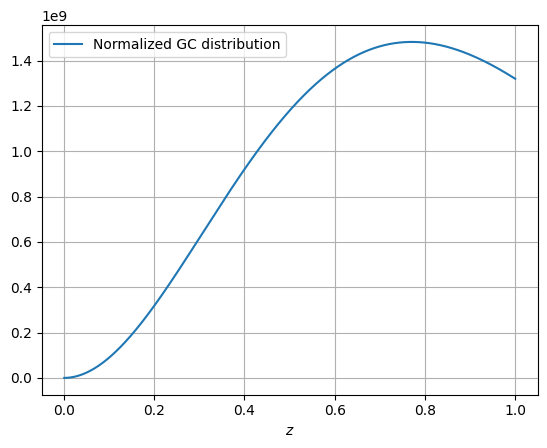

In [14]:
#Since we have changed the maximum value for the bin, the function of n_gc(z) has to be normalized to one
import scipy 
#print(euclid_bin_z)
zmin_euclid = 0.001
zmax_euclid = 2.5
norm_gc, norm_gc_err = scipy.integrate.quad(n_gc,zmin_euclid,zmax_euclid)
gal_per_sqarcmn_GC = 30
total_number_of_galaxies_euclid = 1.62*10**9
print(total_number_of_galaxies_euclid)
def n_gc_eu(redshift):
    return n_gc(redshift) * (total_number_of_galaxies_euclid/norm_gc)

total_number_of_events_gc_our_bin, total_number_of_events_gc_our_bin_err = quad(n_gc_eu,zmin,zmax)
norm_space_gc = np.linspace(zmin,zmax,10000)

number_of_events_per_bin_gc = []

for i in range(len(euclid_bin_z)-1):
    # print(euclid_bin_z[i])
    # print(euclid_bin_z[i+1])
    cnt, cnt_err = quad(n_gc_eu, euclid_bin_z[i],euclid_bin_z[i+1])
    number_of_events_per_bin_gc.append(cnt/total_number_of_events_gc_our_bin)

print("Fraction for the normalized GC distribution:",number_of_events_per_bin_gc)
print('\n')
print(sum(number_of_events_per_bin_gc))

plt.plot(norm_space_gc,n_gc_eu(norm_space_gc),label = "Normalized GC distribution")
#plt.plot(norm_space_gc,norm_gc*n_gc_eu(norm_space_gc),label = "NOT Normalized GC distribution")
plt.xlabel(r'$z$')
plt.legend()
plt.grid()
#plt.xscale('log')

At this juncture, it is crucial to emphasize that the selection of the binning method for computing the $C_l$ values was done manually. Experienced users have the knowledge to make an informed choice based on Dr. Cuoco's paper. However, for those who prefer an automated approach, we have implemented a method to generate bin edges randomly, conduct the same calculations, and then impose specific constraints on the bin morphology. Below is the code for this process, which is currently commented out:

In [15]:
# import random
# number_of_bins_for_mcmc = 5
# zmin = 0
# zmax = 1

# while True:
    
#     def generate_random_floats(min_value_for_binning, max_value_for_binning, total_number_of_random_numbers):
#         random_floats = []
#         for i in range(total_number_of_random_numbers):
#             random_floats.append(random.uniform(min_value_for_binning, max_value_for_binning))
#         return random_floats
    
    
#     euclid_bin_z = generate_random_floats(zmin, zmax, number_of_bins_for_mcmc-1)
#     euclid_bin_z.append(zmax)
#     euclid_bin_z.append(zmin)
#     euclid_bin_z = sorted(euclid_bin_z) 

#     euclid_bin_d_l = []
#     for i in range(len(euclid_bin_z)-1):
#         integration = quad(integrand,zmin, euclid_bin_z[i])
#         euclid_bin_d_l.append(integration[0]*(1+euclid_bin_z[i])*c_over_H0)



#     #Produce the arrays for each type of event and the corresponding percentage 
#     #BBH
#     number_of_events_with_euclid_bin_bbh = []
#     number_of_events_with_euclid_bin_bbh_err =[]
#     for i in range(len(euclid_bin_d_l)-1):
#         cnt = quad(n_bbh_norm,euclid_bin_d_l[i], euclid_bin_d_l[i+1])
#         number_of_events_with_euclid_bin_bbh.append(cnt[0])
#         number_of_events_with_euclid_bin_bbh_err.append(cnt[1])

#     #We will also give a percentage of the total events that each bin contains
#     number_of_events_with_euclid_bin_bbh_perc = []

#     for i in range(len(euclid_bin_d_l)-1):
#         number_of_events_with_euclid_bin_bbh_perc.append((number_of_events_with_euclid_bin_bbh[i]*100)/total_bbh)

#     #bhns
#     number_of_events_with_euclid_bin_bhns = []
#     number_of_events_with_euclid_bin_bhns_err =[]
#     for i in range(len(euclid_bin_d_l)-1):
#         cnt = quad(n_bhns_norm,euclid_bin_d_l[i], euclid_bin_d_l[i+1])
#         number_of_events_with_euclid_bin_bhns.append(cnt[0])
#         number_of_events_with_euclid_bin_bhns_err.append(cnt[1])

#     #We will also give a percentage of the total events that each bin contains
#     number_of_events_with_euclid_bin_bhns_perc = []

#     for i in range(len(euclid_bin_d_l)-1):
#         number_of_events_with_euclid_bin_bhns_perc.append((number_of_events_with_euclid_bin_bhns[i]*100)/total_bhns)

#     #bns
#     number_of_events_with_euclid_bin_bns = []
#     number_of_events_with_euclid_bin_bns_err =[]
#     for i in range(len(euclid_bin_d_l)-1):
#         cnt = quad(n_bns_norm,euclid_bin_d_l[i], euclid_bin_d_l[i+1])
#         number_of_events_with_euclid_bin_bns.append(cnt[0])
#         number_of_events_with_euclid_bin_bns_err.append(cnt[1])


#     #We will also give a percentage of the total events that each bin contains
#     number_of_events_with_euclid_bin_bns_perc = []

#     for i in range(len(euclid_bin_d_l)-1):
#         number_of_events_with_euclid_bin_bns_perc.append((number_of_events_with_euclid_bin_bns[i]*100)/total_bns)
    

#     def has_two_smaller_elements(array, value):
#         count = 0
#         for elem in array:
#             if elem < value:
#                 count += 1
#             if count == 2:
#                 return True
#         return False
    
#     if has_two_smaller_elements(number_of_events_with_euclid_bin_bbh_perc, 10) and has_two_smaller_elements(number_of_events_with_euclid_bin_bbh_perc, 10) and has_two_smaller_elements(number_of_events_with_euclid_bin_bbh_perc, 10) == True:
#         break
        

    
 

# # Print outputs and final plots
# print("Chosen binning:", euclid_bin_d_l)
# print('\n')
# print("Chosen binning z:", euclid_bin_z)
# print('\n')
# ##########
# print("Number of events ber EUCLID bin for BBH",number_of_events_with_euclid_bin_bbh)
# print('\n')
# print("Percentage of the total events in each chosen bin for BBH",number_of_events_with_euclid_bin_bbh_perc)
# print('\n')
# ##############
# print("Number of events ber EUCLID bin for bhns",number_of_events_with_euclid_bin_bhns)
# print('\n')
# print("Percentage of the total events in each chosen bin for bhns",number_of_events_with_euclid_bin_bhns_perc)
# print('\n')
# ##############
# print("Number of events ber EUCLID bin for bns",number_of_events_with_euclid_bin_bns)
# print('\n')
# print("Percentage of the total events in each chosen bin for bns",number_of_events_with_euclid_bin_bns_perc)
# print('\n')

# ############################### The final bins should be added to the derived plots
# plt.plot(norm_space_bhns,n_bhns_norm(norm_space_bhns),label = "Normalized bhns distribution")
# plt.plot(norm_space_bns,n_bns_norm(norm_space_bns),label = "Normalized bns distribution")
# plt.plot(norm_space_bbh,n_bbh_norm(norm_space_bbh),label = "Normalized bbh distribution")

# for i in range(len(euclid_bin_d_l)):
#     plt.axvline(euclid_bin_d_l[i],color='r',linestyle = '--')
# #plt.axvline(zmax, color='r',linestyle = '--')
# plt.xscale('log')
# plt.legend()
# plt.grid()

Here, we will compile all the values that require hard coding and inclusion in the .data files for the BHNS, BBH, and BNS cases, specifically for the MP run. It's important to note that the parameter a inserted in the .data file for the MP run differs from the fitting parameter. This discrepancy arises because we have normalized the distribution to achieve the total number of gravitational wave events for the maximum value of $d_L$.

In [16]:
# #Fitting parameters for each type of merger
# print('a for BBH is', fitting_params_bbh[0])
# (norm_bbh/len(data_bbh_dL))
# print('The fraction of parameter a for BBH with the normalizantion factor is:',fitting_params_bbh[0]/(norm_bbh/len(data_bbh_dL)))
# print('b for BBH is', fitting_params_bbh[1])
# print('c for BBH is', fitting_params_bbh[2])
# print('d for BBH is', fitting_params_bbh[3])
# print('\n')
# print('a for BNS is', fitting_params_bns[0])
# print('The fraction of parameter a for BNS with the normalizantion factor is:',fitting_params_bns[0]/(norm_bns/len(data_bns_dL)))
# print('b for BNS is', fitting_params_bns[1])
# print('c for BNS is', fitting_params_bns[2])
# print('d for BNS is', fitting_params_bns[3])
# print('\n')
# print('a for BHNS is', fitting_params_bhns[0])
# print('The fraction of parameter a for BHNS with the normalizantion factor is:',fitting_params_bhns[0]/(norm_bhns/len(data_bhns_dL)))
# print('b for BHNS is', fitting_params_bhns[1])
# print('c for BHNS is', fitting_params_bhns[2])
# print('1d for BHNS is', fitting_params_bhns[3])
# print('\n')

# #Number of bins
# print('Total number of bins:', len(euclid_bin_z)-1)
# #Maximum and minimum redshifts chosen
# print('Maximum redshift zmax:', zmax)
# print('Minimum redshift zmin:', zmin)
# print('\n')

# #Maximum and minumum d_L for the chosen binning in redshft space
# print('Total chosen bin edges for z:',euclid_bin_z)
# print('Total chosen bin edges for d_L',euclid_bin_d_l)

# print('Minimum d_L for chosen zmin and zmax:', euclid_bin_d_l[0])

# print('Maximum d_L for chosen zmin and zmax:', euclid_bin_d_l[len(euclid_bin_d_l)-1])

# #Normalization of the n_gc distribution
# print('Normalization of the galaxy distribution function for zmin till zmax:', norm_gc)

# #Fraction of events per bin
# print("Noise for the normalized GC distribution:",number_of_events_per_bin_gc)
# print("Sum of total each fractions (should be equal to 1):",sum(number_of_events_per_bin_gc))
# print('\n')

# print("Fraction of events per bin for BHNS",number_of_events_with_euclid_bin_bhns_perc)
# print("Sum of total each fractions for BHNS (should be equal to 1):",sum(number_of_events_with_euclid_bin_bhns_perc))
# print('\n')

# print("Fraction of events per bin for BNS",number_of_events_with_euclid_bin_bns_perc)
# print("Sum of total each fractions for BNS (should be equal to 1):",sum(number_of_events_with_euclid_bin_bns_perc))
# print('\n')

# print("Fraction of events per bin for BBH",number_of_events_with_euclid_bin_bbh_perc)
# print("Sum of total each fractions for BBH (should be equal to 1):",sum(number_of_events_with_euclid_bin_bbh_perc))
# print('\n')

At this point, Dr. Cuoco has recommended an alternative method for calculating the Poisson noise, considering that the Poisson noise arising from the discrete number of sources in the catalog is given by:

$
C_N^{ii} = \frac{\Omega_{\text{fov}}}{N_i}
$

Here, $N_i$ represents the total number of sources within the catalog for the respective cases 'a' and 'b' within the considered field of view. It can be assumed that $\Omega_{\text{fov}} = 15000 \, \text{deg}^2$.


In [17]:
#Calculation of the Poisson noise

f_fov_gw = 1
f_fov_gc =0.3636
omega_fov_gw = 4*np.pi*f_fov_gw
omega_fov_gc = 4*np.pi*f_fov_gc

#bbh
poisson_noise_bbh = []
for i in range(len(euclid_bin_d_l)-1):
    poisson_noise_bbh.append((omega_fov_gw/number_of_events_with_euclid_bin_bbh[i]))

print("Poisson noise for BBH events:",poisson_noise_bbh)
print('\n')



#bhns
poisson_noise_bhns = []
for i in range(len(euclid_bin_d_l)-1):
    poisson_noise_bhns.append((omega_fov_gw/number_of_events_with_euclid_bin_bhns[i]))

print("Poisson noise for BHNS events:",poisson_noise_bhns)
print('\n')

#bns
poisson_noise_bns = []
for i in range(len(euclid_bin_d_l)-1):
    poisson_noise_bns.append((omega_fov_gw/number_of_events_with_euclid_bin_bns[i]))

print("Poisson noise for BNS events:",poisson_noise_bns)
print('\n')

#GC
poisson_noise_gc = []
number_of_events_gc =[]

for i in range(len(euclid_bin_z)-1):
    cnt = quad(n_gc_eu, euclid_bin_z[i],euclid_bin_z[i+1])
    poisson_noise_gc.append(omega_fov_gc/cnt[0])
    number_of_events_gc.append(cnt[0])

print('Number of events per bin GCGC', number_of_events_gc)
print("Poisson noise for GC survey:",poisson_noise_gc)
print('\n')


Poisson noise for BBH events: [0.058388928733092094, 0.010142608388654181, 0.005266766494665461, 0.00203467388144048, 0.0014269056731316895]


Poisson noise for BHNS events: [0.007149133247798701, 0.001882241448392933, 0.0021889387587988867, 0.004335204924849907, 0.12511032968632596]


Poisson noise for BNS events: [0.011123958015871288, 0.01706352089323612, 1.5935322328207788, 30717.122344875705, 3.4597859312023917e+22]


Number of events per bin GCGC [3026236.235101078, 19430623.313607763, 46380868.275247775, 182462496.5781814, 701077577.2212527]
Poisson noise for GC survey: [1.5098399465263103e-06, 2.3515109534242857e-07, 9.85132992393637e-08, 2.5041487654002455e-08, 6.517299231692621e-09]




In [18]:
# #We will also give a percentage of the total events that each bin contains
# #bbh
# fraction_of_events_per_bin_bbh = []
# f_cov = 0.3636
# omega_fov = 4*np.pi*f_cov 
# for i in range(len(euclid_bin_d_l)-1):
#     fraction_of_events_per_bin_bbh.append((omega_fov/number_of_events_with_euclid_bin_bbh[i]))

# print("Fraction of events per bin for BBH events:",fraction_of_events_per_bin_bbh)
# print('\n')
# #bhns
# fraction_of_events_per_bin_bhns = []
# for i in range(len(euclid_bin_d_l)-1):
#     fraction_of_events_per_bin_bhns.append((omega_fov/number_of_events_with_euclid_bin_bhns[i]))

# print("Fraction of events per bin for BHNS events:",fraction_of_events_per_bin_bhns)
# print('\n')

# #bns
# fraction_of_events_per_bin_bns = []
# for i in range(len(euclid_bin_d_l)-1):
#     fraction_of_events_per_bin_bns.append((omega_fov/number_of_events_with_euclid_bin_bns[i]))

# print("Fraction of events per bin for BNS events:",fraction_of_events_per_bin_bns)
# print('\n')


# #GC
# fraction_of_events_per_bin_gc = []

# for i in range(len(euclid_bin_z)-1):
#     # print(euclid_bin_z[i])
#     # print(euclid_bin_z[i+1])
#     cnt, cnt_err = quad(n_gc_eu, euclid_bin_z[i],euclid_bin_z[i+1])
#     fraction_of_events_per_bin_gc.append(omega_fov/cnt)

# print("Fraction of events per bin for GC survey:",fraction_of_events_per_bin_gc)
# print('\n')

Once again, our objective is to compile all the values that need to be hard-coded and entered into the `.data` files for `BHNS`, `BBH`, and `BNS` cases, specifically for the `MP` run. It's important to note that the parameter `a` inserted in the `.data` file for the `MP` run differs from the fitting parameter. This distinction arises because we have normalized the distribution to obtain the total number of gravitational wave (GW) events for the maximum value of $d_L$.


In [19]:
#norm for each merger
print("Normalization of distribution times length for BBH:", norm_bbh/len(data_bbh_redshifts))
print("Normalization of distribution times length for BHNS:", norm_bhns/len(data_bhns_redshifts))
print("Normalization of distribution times length for BNS:", norm_bns/len(data_bns_redshifts))
#Fitting parameters for each type of merger
print('a for BBH is', fitting_params_bbh[0])
(norm_bbh/len(data_bbh_dL))
print('The fraction of parameter a for BBH with the normalizantion factor is:',fitting_params_bbh[0]/(norm_bbh/len(data_bbh_dL)))
print('b for BBH is', fitting_params_bbh[1])
print('c for BBH is', fitting_params_bbh[2])
print('d for BBH is', fitting_params_bbh[3])
print('\n')
print('a for BNS is', fitting_params_bns[0])
print('The fraction of parameter a for BNS with the normalizantion factor is:',fitting_params_bns[0]/(norm_bns/len(data_bns_dL)))
print('b for BNS is', fitting_params_bns[1])
print('c for BNS is', fitting_params_bns[2])
print('d for BNS is', fitting_params_bns[3])
print('\n')
print('a for BHNS is', fitting_params_bhns[0])
print('The fraction of parameter a for BHNS with the normalizantion factor is:',fitting_params_bhns[0]/(norm_bhns/len(data_bhns_dL)))
print('b for BHNS is', fitting_params_bhns[1])
print('c for BHNS is', fitting_params_bhns[2])
print('1d for BHNS is', fitting_params_bhns[3])
print('\n')

#Number of bins
print('Total number of bins:', len(euclid_bin_z)-1)
#Maximum and minimum redshifts chosen
print('Maximum redshift zmax:', zmax)
print('Minimum redshift zmin:', zmin)
print('\n')

#Maximum and minumum d_L for the chosen binning in redshft space
print('Total chosen bin edges for z:',euclid_bin_z)
print('Total chosen bin edges for d_L',euclid_bin_d_l)

print('Minimum d_L for chosen zmin and zmax:', euclid_bin_d_l[0])

print('Maximum d_L for chosen zmin and zmax:', euclid_bin_d_l[len(euclid_bin_d_l)-1])

#Normalization of the n_gc distribution
print('Normalization of the galaxy distribution function for zmin till zmax:', norm_gc)


#Poisson noise arrays
print("Poisson noise for GC survey:",poisson_noise_gc)
print('\n')

print("Poisson noise for BHNS",poisson_noise_bhns)
#print("Sum of total each fractions for BHNS (should be equal to 1):",sum(number_of_events_with_euclid_bin_bhns_perc))
print('\n')

print("Poisson noise for BNS",poisson_noise_bns)
#print("Sum of total each fractions for BNS (should be equal to 1):",sum(number_of_events_with_euclid_bin_bns_perc))
print('\n')

print("Poisson noise for BBH",poisson_noise_bbh)
#print("Sum of total each fractions for BBH (should be equal to 1):",sum(number_of_events_with_euclid_bin_bbh_perc))
print('\n')

Normalization of distribution times length for BBH: 179.39466063601958
Normalization of distribution times length for BHNS: 56.135973553788055
Normalization of distribution times length for BNS: 41.98616351863311
a for BBH is 0.0005450103278744837
The fraction of parameter a for BBH with the normalizantion factor is: 3.0378907208970498e-06
b for BBH is 2.2341373221688468
c for BBH is 0.0017225215782462997
d for BBH is 0.8037448246377223


a for BNS is 0.018666690313326073
The fraction of parameter a for BNS with the normalizantion factor is: 0.0004443543582370717
b for BNS is 1.651888198166992
c for BNS is 0.002301500882264538
d for BNS is 2.130355817727089


a for BHNS is 0.0013262997767959181
The fraction of parameter a for BHNS with the normalizantion factor is: 2.3625181325674133e-05
b for BHNS is 2.2338018043873773
c for BHNS is 0.0019060601427432775
1d for BHNS is 1.238451891110231


Total number of bins: 5
Maximum redshift zmax: 1.0
Minimum redshift zmin: 0.001


Total chosen bi

Here, we are going to explain the tasks that need to be completed in the upcoming days and the subsequent steps in our work. Firstly, it's crucial to emphasize that our work is being conducted in the GW_GCph branch within the private MP repository on GitHub. The .param and .data files can be located under the names dark_sirens_. All the likelihoods remain consistent, and therefore, we are currently working within the likelihood_class file situated in the montepython/ directory.

The issue we are currently addressing dates back to when we initially began constructing the likelihood with Julien. Our approach involved taking the euclid_photometric_z likelihood and adapting it for our specific purposes. In essence, we aimed to keep the GC (galaxy cluster) part intact, with necessary modifications for the GW (gravitational wave) component. While this approach seemed promising, it has revealed two fundamental problems:

We have been utilizing the same window functions for both GW and GC.
The calculation of $C_l$ values for GW is conducted in z-space rather than $d_L$.
It's important to note that these issues are not programming mistakes but rather physics-related challenges. I have already begun addressing and correcting some of these issues, including modifications to accommodate our assumptions, such as noise considerations. However, this process requires time as running the code does not immediately reveal these problems.

We refrained from pushing any changes to GitHub at this point because I want to ensure that the corrections are thoroughly completed. Once this check is finalized, we will have effectively followed the work scheme outlined in Cuoco's paper. With this check properly conducted, we will introduce some additional functionalities that could potentially be valuable in the future.

Up to this point, we have primarily considered constant binning. However, we are in the process of developing code that, when a specific bias function is assumed, will generate text ready for copying and pasting into the .param file.

In [20]:
def bias_gc(redshift):
    return 1.00
    
zmin  = 0.001
zmax = 1.0
#euclid_bin_z = [zmin, 0.418, 0.560, 0.678, 0.789, 0.900, 1.019, 1.155, 1.324, 1.576, zmax]
euclid_bin_z = [ zmin, 0.1, 0.2, 0.3, 0.5, zmax]
euclid__mid_points_z = []

for i in range(len(euclid_bin_z)-1):
    cnt =  (euclid_bin_z[i+1]+euclid_bin_z[i])/2
    euclid__mid_points_z.append(cnt)

print(euclid__mid_points_z)

array_bias_gc =[]
for i in range(len(euclid__mid_points_z)):
    cnt = bias_gc(euclid__mid_points_z[i])
    array_bias_gc.append(cnt)

print(array_bias_gc)
print("===========================================")

def bias_gw(redshift):
    return 1.37



array_bias_gw =[]
for i in range(len(euclid__mid_points_z)):
    cnt = bias_gw(euclid__mid_points_z[i])
    array_bias_gw.append(cnt)

print(array_bias_gw)

[0.0505, 0.15000000000000002, 0.25, 0.4, 0.75]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.37, 1.37, 1.37, 1.37, 1.37]


Here is a code for a ready to use ```.param``` file generator

In [21]:
import os 

dir_path = '/home/kostis/Desktop/private_monte_python/montepython/montepython/likelihoods'
files = os.listdir(dir_path)

array_likelihoods_names = []

# for file in files:
#     print(str(file))

for file in files:
    array_likelihoods_names.append(file)

sorted_array_likelihoods_names = sorted(array_likelihoods_names)
# print('All the available likelihoods ready to be used:')
# print(sorted_array_likelihoods_names)
# print("\n")

def search_likelihood_names (sorted_array_likelihoods_names, letters):
    results = []
    for elem in sorted_array_likelihoods_names:
        if elem.startswith(letters):
            results.append(elem)
    return results

#Here the user can put his one search, only the name should change

user_input_start = "dark_sirens_"
print("According to the user input this is the matching likelihood names:")
print(search_likelihood_names(sorted_array_likelihoods_names,user_input_start))






According to the user input this is the matching likelihood names:
['dark_sirens_bbh', 'dark_sirens_bhns', 'dark_sirens_bns']


User should define the required parameters for the MP run.

In [22]:
#Cosmological paramters 

cosmological_params_planck_values = {'omega_b': 2.249, 'omega_cdm': 0.1120, 'n_s': 0.965, 'A_s': 2.42, 'h': 0.674, 'tau_reio':0.054}
keys_pl = list(cosmological_params_planck_values.keys())
cosmological_params_planck_lower_bound = {'omega_b': 'None', 'omega_cdm': 'None', 'n_s': 'None', 'A_s': 'None', 'h': 'None', 'tau_reio':'None'}
cosmological_params_planck_upper_bound = {'omega_b': 'None', 'omega_cdm': 'None', 'n_s': 'None', 'A_s': 'None', 'h': 'None', 'tau_reio':'None'}
one_sigma_cosmo = {'omega_b': 0.0, 'omega_cdm': 0.0, 'n_s': 0.0, 'A_s': 0.0, 'h': 0.0, 'tau_reio': 0.0}
scalling_cosmo = {'omega_b': 0.01, 'omega_cdm': 1.0, 'n_s': 1.0, 'A_s': 1.e-9, 'h': 1.0, 'tau_reio': 1.0}


#Nuisance parameters
lower_bound_biases_gc = None
upper_bound_biases_gc = None
one_sigma_biases_gc = 0.0
scalling_biases_gc = 1


lower_bound_biases_gw = None
upper_bound_biases_gw = None
one_sigma_biases_gw = 0.0
scalling_biases_gw = 1


number_of_steps_taken = 10
user_write_step = 5

Here, a code has been written to generate the `.param` file following the principles of MontePython (MP) usage. The user is required to specify the type of merger by typing `bbh`, `bhns`, or `bns`. In any other case, there will be no output. Additionally, it is crucial to update the corresponding file paths for saving.

If this approach proves to be viable, there will be a more detailed explanation of how to use it, or even better, it will be integrated into the code itself.


In [23]:
import sys
user_input_merger_param = input("Choose type of merger: ")
if user_input_merger_param == 'bhns':
    print("#------Experiments to test (separated with commas)-----")  
    print(f"# To see all the available ones, please look in the")
    print(f"# montepython/likelihoods folder. Every folder there is a valid likelihood to test.")
    #Give the name of the used Likelihoods, should match the names used in MP
    #Can directly, write them, or use the code in the above block to search it and just copy it

    print(f"data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])\n")


    print(f"#------ Parameter list -------")
    print(f"# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]")
    print(f"# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)")
    print(f"# - if fixed, put 1-sigma to 0")
    print(f"# - if scale irrelevant, put to 1, otherwise to the appropriate factor")
    print(f"# - role is either 'cosmo', 'nuisance' or 'derived'\n")

    print(f"#Cosmological parameters list")



    for i in range(len(keys_pl)):
        print(f"data.parameters['{keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")

    print("\n")


    print(f"# Nuisance parameter list, same call, except the name does not have to be a class name")

    for i in range(len(array_bias_gc)):
        print(f"data.parameters[bias_GC_{i+1}] = [{array_bias_gc[i]}, {lower_bound_biases_gc}, {upper_bound_biases_gc}, {one_sigma_biases_gc}, {scalling_biases_gc}, 'nuisance']")




    for i in range(len(array_bias_gw)):
        print(f"data.parameters[bias_GW_{i+1}] = [{array_bias_gw[i]}, {lower_bound_biases_gw}, {upper_bound_biases_gw}, {one_sigma_biases_gw}, {scalling_biases_gw}, 'nuisance']")

    print("\n")

    print(f"# Derived parameter list")
    print(f"#data.parameters['z_reio']       = [0,       -1, -1, 0,1,  'derived']")
    print(f"#data.parameters['Omega_Lambda'] = [0,       -1, -1, 0,1,  'derived']\n")

    print(f"#------ Mcmc parameters ----")
    print(f"# Number of steps taken, by default (overwritten by the -N command)")

    print(f"data.N = {number_of_steps_taken}")
    print(f"# Number of accepted steps before writing to file the chain. Larger means less")
    print(f"# access to disc, but this is not so much time consuming.")


    print(f"data.write_step = {user_write_step}")
    
if user_input_merger_param == 'bbh':
    
    print("#------Experiments to test (separated with commas)-----")  
    print(f"# To see all the available ones, please look in the")
    print(f"# montepython/likelihoods folder. Every folder there is a valid likelihood to test.")
    #Give the name of the used Likelihoods, should match the names used in MP
    #Can directly, write them, or use the code in the above block to search it and just copy it

    print(f"data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])\n")


    print(f"#------ Parameter list -------")
    print(f"# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]")
    print(f"# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)")
    print(f"# - if fixed, put 1-sigma to 0")
    print(f"# - if scale irrelevant, put to 1, otherwise to the appropriate factor")
    print(f"# - role is either 'cosmo', 'nuisance' or 'derived'\n")

    print(f"#Cosmological parameters list")



    for i in range(len(keys_pl)):
        print(f"data.parameters['{keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")

    print("\n")


    print(f"# Nuisance parameter list, same call, except the name does not have to be a class name")

    for i in range(len(array_bias_gc)):
        print(f"data.parameters[bias_GC_{i+1}] = [{array_bias_gc[i]}, {lower_bound_biases_gc}, {upper_bound_biases_gc}, {one_sigma_biases_gc}, {scalling_biases_gc}, 'nuisance']")




    for i in range(len(array_bias_gw)):
        print(f"data.parameters[bias_GW_{i+1}] = [{array_bias_gw[i]}, {lower_bound_biases_gw}, {upper_bound_biases_gw}, {one_sigma_biases_gw}, {scalling_biases_gw}, 'nuisance']")

    print("\n")

    print(f"# Derived parameter list")
    print(f"#data.parameters['z_reio']       = [0,       -1, -1, 0,1,  'derived']")
    print(f"#data.parameters['Omega_Lambda'] = [0,       -1, -1, 0,1,  'derived']\n")

    print(f"#------ Mcmc parameters ----")
    print(f"# Number of steps taken, by default (overwritten by the -N command)")

    print(f"data.N = {number_of_steps_taken}")
    print(f"# Number of accepted steps before writing to file the chain. Larger means less")
    print(f"# access to disc, but this is not so much time consuming.")


    print(f"data.write_step = {user_write_step}")
if user_input_merger_param == 'bns':
    print("#------Experiments to test (separated with commas)-----")  
    print(f"# To see all the available ones, please look in the")
    print(f"# montepython/likelihoods folder. Every folder there is a valid likelihood to test.")
    #Give the name of the used Likelihoods, should match the names used in MP
    #Can directly, write them, or use the code in the above block to search it and just copy it

    print(f"data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])\n")


    print(f"#------ Parameter list -------")
    print(f"# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]")
    print(f"# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)")
    print(f"# - if fixed, put 1-sigma to 0")
    print(f"# - if scale irrelevant, put to 1, otherwise to the appropriate factor")
    print(f"# - role is either 'cosmo', 'nuisance' or 'derived'\n")

    print(f"#Cosmological parameters list")



    for i in range(len(keys_pl)):
        print(f"data.parameters['{keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")

    print("\n")


    print(f"# Nuisance parameter list, same call, except the name does not have to be a class name")

    for i in range(len(array_bias_gc)):
        print(f"data.parameters[bias_GC_{i+1}] = [{array_bias_gc[i]}, {lower_bound_biases_gc}, {upper_bound_biases_gc}, {one_sigma_biases_gc}, {scalling_biases_gc}, 'nuisance']")




    for i in range(len(array_bias_gw)):
        print(f"data.parameters[bias_GW_{i+1}] = [{array_bias_gw[i]}, {lower_bound_biases_gw}, {upper_bound_biases_gw}, {one_sigma_biases_gw}, {scalling_biases_gw}, 'nuisance']")

    print("\n")

    print(f"# Derived parameter list")
    print(f"#data.parameters['z_reio']       = [0,       -1, -1, 0,1,  'derived']")
    print(f"#data.parameters['Omega_Lambda'] = [0,       -1, -1, 0,1,  'derived']\n")

    print(f"#------ Mcmc parameters ----")
    print(f"# Number of steps taken, by default (overwritten by the -N command)")

    print(f"data.N = {number_of_steps_taken}")
    print(f"# Number of accepted steps before writing to file the chain. Larger means less")
    print(f"# access to disc, but this is not so much time consuming.")


    print(f"data.write_step = {user_write_step}")
        

#------Experiments to test (separated with commas)-----
# To see all the available ones, please look in the
# montepython/likelihoods folder. Every folder there is a valid likelihood to test.
data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])

#------ Parameter list -------
# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]
# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)
# - if fixed, put 1-sigma to 0
# - if scale irrelevant, put to 1, otherwise to the appropriate factor
# - role is either 'cosmo', 'nuisance' or 'derived'

#Cosmological parameters list
data.parameters['omega_b'] = [2.249, None, None, 0.0, 0.01, 'cosmo']
data.parameters['omega_cdm'] = [0.112, None, None, 0.0, 1.0, 'cosmo']
data.parameters['n_s'] = [0.965, None, None, 0.0, 1.0, 'cosmo']
data.parameters['A_s'] = [2.42, None, None, 0.0, 1e-09, 'cosmo']
data.parameters['h'] = [0.674, None, None, 0.0, 1.0, 'cosmo']
data.parameters['tau_reio']

Here is the same code as above, but it stores the generate result in a new txt file with the correct ending and name according to MP rules.

In [24]:
# import sys
# user_input_merger_param = input("Choose type of merger: ")
# if user_input_merger_param == 'bhns':
#     with open('/home/krevis/Desktop/test_data_file/dark_sirens_bhns.param',"w") as f:    
#         sys.stdout = f
#         print("#------Experiments to test (separated with commas)-----")  
#         print(f"# To see all the available ones, please look in the")
#         print(f"# montepython/likelihoods folder. Every folder there is a valid likelihood to test.")
#         #Give the name of the used Likelihoods, should match the names used in MP
#         #Can directly, write them, or use the code in the above block to search it and just copy it

#         print(f"data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])\n")


#         print(f"#------ Parameter list -------")
#         print(f"# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]")
#         print(f"# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)")
#         print(f"# - if fixed, put 1-sigma to 0")
#         print(f"# - if scale irrelevant, put to 1, otherwise to the appropriate factor")
#         print(f"# - role is either 'cosmo', 'nuisance' or 'derived'\n")

#         print(f"#Cosmological parameters list")



#         for i in range(len(keys_pl)):
#             print(f"data.parameters['{keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")

#         print("\n")


#         print(f"# Nuisance parameter list, same call, except the name does not have to be a class name")

#         for i in range(len(array_bias_gc)):
#             print(f"data.parameters[bias_GC_{i+1}] = [{array_bias_gc[i]}, {lower_bound_biases_gc}, {upper_bound_biases_gc}, {one_sigma_biases_gc}, {scalling_biases_gc}, 'nuisance']")




#         for i in range(len(array_bias_gw)):
#             print(f"data.parameters[bias_GW_{i+1}] = [{array_bias_gw[i]}, {lower_bound_biases_gw}, {upper_bound_biases_gw}, {one_sigma_biases_gw}, {scalling_biases_gw}, 'nuisance']")

#         print("\n")

#         print(f"# Derived parameter list")
#         print(f"#data.parameters['z_reio']       = [0,       -1, -1, 0,1,  'derived']")
#         print(f"#data.parameters['Omega_Lambda'] = [0,       -1, -1, 0,1,  'derived']\n")

#         print(f"#------ Mcmc parameters ----")
#         print(f"# Number of steps taken, by default (overwritten by the -N command)")

#         print(f"data.N = {number_of_steps_taken}")
#         print(f"# Number of accepted steps before writing to file the chain. Larger means less")
#         print(f"# access to disc, but this is not so much time consuming.")


#         print(f"data.write_step = {user_write_step}")
#         sys.stdout = sys.__stdout__
# if user_input_merger_param == 'bbh':
#     with open('/home/krevis/Desktop/test_data_file/dark_sirens_bbh.param',"w") as f:    
#         sys.stdout = f
#         print("#------Experiments to test (separated with commas)-----")  
#         print(f"# To see all the available ones, please look in the")
#         print(f"# montepython/likelihoods folder. Every folder there is a valid likelihood to test.")
#         #Give the name of the used Likelihoods, should match the names used in MP
#         #Can directly, write them, or use the code in the above block to search it and just copy it

#         print(f"data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])\n")


#         print(f"#------ Parameter list -------")
#         print(f"# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]")
#         print(f"# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)")
#         print(f"# - if fixed, put 1-sigma to 0")
#         print(f"# - if scale irrelevant, put to 1, otherwise to the appropriate factor")
#         print(f"# - role is either 'cosmo', 'nuisance' or 'derived'\n")

#         print(f"#Cosmological parameters list")



#         for i in range(len(keys_pl)):
#             print(f"data.parameters['{keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")

#         print("\n")


#         print(f"# Nuisance parameter list, same call, except the name does not have to be a class name")

#         for i in range(len(array_bias_gc)):
#             print(f"data.parameters[bias_GC_{i+1}] = [{array_bias_gc[i]}, {lower_bound_biases_gc}, {upper_bound_biases_gc}, {one_sigma_biases_gc}, {scalling_biases_gc}, 'nuisance']")




#         for i in range(len(array_bias_gw)):
#             print(f"data.parameters[bias_GW_{i+1}] = [{array_bias_gw[i]}, {lower_bound_biases_gw}, {upper_bound_biases_gw}, {one_sigma_biases_gw}, {scalling_biases_gw}, 'nuisance']")

#         print("\n")

#         print(f"# Derived parameter list")
#         print(f"#data.parameters['z_reio']       = [0,       -1, -1, 0,1,  'derived']")
#         print(f"#data.parameters['Omega_Lambda'] = [0,       -1, -1, 0,1,  'derived']\n")

#         print(f"#------ Mcmc parameters ----")
#         print(f"# Number of steps taken, by default (overwritten by the -N command)")

#         print(f"data.N = {number_of_steps_taken}")
#         print(f"# Number of accepted steps before writing to file the chain. Larger means less")
#         print(f"# access to disc, but this is not so much time consuming.")


#         print(f"data.write_step = {user_write_step}")
#         sys.stdout = sys.__stdout__
# if user_input_merger_param == 'bns':
#     with open('/home/krevis/Desktop/test_data_file/dark_sirens_bns.param',"w") as f:    
#         sys.stdout = f
#         print("#------Experiments to test (separated with commas)-----")  
#         print(f"# To see all the available ones, please look in the")
#         print(f"# montepython/likelihoods folder. Every folder there is a valid likelihood to test.")
#         #Give the name of the used Likelihoods, should match the names used in MP
#         #Can directly, write them, or use the code in the above block to search it and just copy it

#         print(f"data.experiments=['dark_sirens_bbh', 'dark_sirens_bns', 'dark_sirens_bhns'])\n")


#         print(f"#------ Parameter list -------")
#         print(f"# data.parameters[class name] = [mean, min, max, 1-sigma, scale, role]")
#         print(f"# - if min max irrelevant, put to -1 or None (if you want a boundary of -1, use -1.0)")
#         print(f"# - if fixed, put 1-sigma to 0")
#         print(f"# - if scale irrelevant, put to 1, otherwise to the appropriate factor")
#         print(f"# - role is either 'cosmo', 'nuisance' or 'derived'\n")

#         print(f"#Cosmological parameters list")



#         for i in range(len(keys_pl)):
#             print(f"data.parameters['{keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")

#         print("\n")


#         print(f"# Nuisance parameter list, same call, except the name does not have to be a class name")

#         for i in range(len(array_bias_gc)):
#             print(f"data.parameters[bias_GC_{i+1}] = [{array_bias_gc[i]}, {lower_bound_biases_gc}, {upper_bound_biases_gc}, {one_sigma_biases_gc}, {scalling_biases_gc}, 'nuisance']")




#         for i in range(len(array_bias_gw)):
#             print(f"data.parameters[bias_GW_{i+1}] = [{array_bias_gw[i]}, {lower_bound_biases_gw}, {upper_bound_biases_gw}, {one_sigma_biases_gw}, {scalling_biases_gw}, 'nuisance']")

#         print("\n")

#         print(f"# Derived parameter list")
#         print(f"#data.parameters['z_reio']       = [0,       -1, -1, 0,1,  'derived']")
#         print(f"#data.parameters['Omega_Lambda'] = [0,       -1, -1, 0,1,  'derived']\n")

#         print(f"#------ Mcmc parameters ----")
#         print(f"# Number of steps taken, by default (overwritten by the -N command)")

#         print(f"data.N = {number_of_steps_taken}")
#         print(f"# Number of accepted steps before writing to file the chain. Larger means less")
#         print(f"# access to disc, but this is not so much time consuming.")


#         print(f"data.write_step = {user_write_step}")
#         sys.stdout = sys.__stdout__

In [25]:
# cosmological_params_planck_values = {'omega_b': 2.249, 'omega_cdm': 0.1120, 'n_s': 0.965, 'A_s': 2.42, 'h': 0.674, 'tau_reio':0.054}
# keys_pl = list(cosmological_params_planck_values.keys())
# cosmological_params_planck_lower_bound = {'omega_b': 'None', 'omega_cdm': 'None', 'n_s': 'None', 'A_s': 'None', 'h': 'None', 'tau_reio':'None'}
# cosmological_params_planck_upper_bound = {'omega_b': 'None', 'omega_cdm': 'None', 'n_s': 'None', 'A_s': 'None', 'h': 'None', 'tau_reio':'None'}
# one_sigma_cosmo = {'omega_b': 0.0, 'omega_cdm': 0.0, 'n_s': 0.0, 'A_s': 0.0, 'h': 0.0, 'tau_reio': 0.0}
# scalling_cosmo = {'omega_b': 0.01, 'omega_cdm': 1.0, 'n_s': 1.0, 'A_s': 1.e-9, 'h': 1.0, 'tau_reio': 1.0}


# print(cosmological_params_planck_values['omega_b'])
# for i in range(len(keys_pl)):
#     print(f"data.parameters['{tuple_keys_pl[i]}'] = [{cosmological_params_planck_values[keys_pl[i]]}, {cosmological_params_planck_lower_bound[keys_pl[i]]}, {cosmological_params_planck_upper_bound[keys_pl[i]]}, {one_sigma_cosmo[keys_pl[i]]}, {scalling_cosmo[keys_pl[i]]}, 'cosmo']")



In [26]:
#a values final
a_bbh_f =  fitting_params_bbh[0]/(norm_bbh/len(data_bbh_dL))
a_bhns_f = fitting_params_bhns[0]/(norm_bhns/len(data_bhns_dL))
a_bns_f = fitting_params_bns[0]/(norm_bns/len(data_bns_dL))



The same work can be done to generate the required ```.data``` file for the MP run. Choose between bbh, bhns and bns. The user has to run both blocks to derive the results and choose his one file paths.

In [27]:
user_input_merger = input("Choose type of merger: ")


#choose the probes: GW or GC or GW_GCph_XC
probes = 'GW_GCph_XC'
#evaluated l-values
lminimum = 10
# lmax_GW >= lmax_GC, lmax_XC
lmaxim_GW = 1000
lmaxim_GC = 1000
lmaxim_XC = 1000
# number of discrete l values
lbins = 100
#a_ is a quite different from the others (TODO: Make the code more elegant)
a_dict = {  }
sky_cov = 0.3636
user_gal_per_sqarcmn_GC = 30
user_nzmax = 200
user_n_d_Lmax = 200
user_use_halofit = False

user_k_min_h_by_Mpc = 0.001
user_k_max_h_by_Mpc = 50.0


user_scale_dependent_f = False
user_bias_model = 'binned_constant'






In [28]:
import sys

if user_input_merger == 'bhns':
    print(f"# data directory and fiducial file")
    print(f"dark_sirens_{user_input_merger}.data_directory = data.path['data']")
    print(f"dark_sirens_{user_input_merger}.fiducial_file =  'dark_sirens_{user_input_merger}_fiducial.dat' ")
    # print(f"{lh_name}.probe = ['{probes}']")
    # print(f"{lh_name}.probe = ['{probes}']")
    

    print(f"dark_sirens_{user_input_merger}.probe = ['{probes}']")
    print(f"# evaluated l-values\n")
    print(f"dark_sirens_{user_input_merger}.lmin = {lminimum}")

    print(f"dark_sirens_{user_input_merger}.lmax_GW = {lmaxim_GW}")
    print(f"dark_sirens_{user_input_merger}.lmax_GC = {lmaxim_GC}")
    print(f"dark_sirens_{user_input_merger}.lmax_XC = {lmaxim_XC}\n")

    print(f"number of discrete l values")
    print(f"dark_sirens_{user_input_merger}.lbin = {lbins}\n")

    print(f"#Define the values of the fitting parameters using the provided jupyter notebook")

    print(f"dark_sirens_{user_input_merger}.a = {a_bhns_f}")
    print(f"dark_sirens_{user_input_merger}.b = {b_bhns}")
    print(f"dark_sirens_{user_input_merger}.c = {c_bhns}")
    print(f"dark_sirens_{user_input_merger}.d = {d_bhns}\n")

    print(f"# Survey specifications")
    print(f"# Covered redshift")
    print(f"dark_sirens_{user_input_merger}.zmin = {zmin}")
    print(f"dark_sirens_{user_input_merger}.zmax = {zmax}\n")


    print(f"# Covered luminosity distance")


    print(f"dark_sirens_{user_input_merger}.d_L_min = {euclid_bin_d_l[0]}")
    print(f"dark_sirens_{user_input_merger}.d_L_max = {euclid_bin_d_l[len(euclid_bin_d_l)-1]}")
    print(f"dark_sirens_{user_input_merger}.norm_gc = {norm_gc}")
    print(f"dark_sirens_{user_input_merger}.z_bin_edge = np.array({euclid_bin_z})")
    print(f"dark_sirens_{user_input_merger}.d_L_bin_edge = np.array({euclid_bin_d_l})\n")
    print(f"#number of bins")
    print(f"dark_sirens_{user_input_merger}.nbin = {len(euclid_bin_z)-1}")
    print(f"dark_sirens_{user_input_merger}.fsky = {sky_cov}\n")
    print(f"Total number of events")
    print(f"dark_sirens_{user_input_merger}.merger_events = {len(data_bhns_redshifts)}")
    print(f"#Number of galaxies per square arcminutes")
    print(f"dark_sirens_{user_input_merger}.gal_per_sqarcmn_GC = {user_gal_per_sqarcmn_GC}\n")
    print(f"comutational precision")
    print(f"# number of discrete z values in integrations")
    print(f"dark_sirens_{user_input_merger}.nzmax = {user_nzmax}")
    print(f"# number of discrete dL values in integrations")
    print(f"dark_sirens_{user_input_merger}.n_d_Lmax = {user_n_d_Lmax}\n")
    print(f"# number of discrete k values in integrations")
    print(f"#dark_sirens_bhns.nkmax = 1000")
    print(f"# non-linear correction")
    print(f"dark_sirens_{user_input_merger}.use_halofit = {user_use_halofit}\n")
    print(f"# note even if False, halofit will be used if the .param")
    print(f"# file or any other likelihood specifies halofit")
    print(f"# # Evaluted k-values in h/Mpc")
    print(f"dark_sirens_{user_input_merger}.k_min_h_by_Mpc = {user_k_min_h_by_Mpc}")
    print(f"dark_sirens_{user_input_merger}.k_max_h_by_Mpc = {user_k_max_h_by_Mpc}\n")
    print(f"# use scale-independent growth factor f (like in IST:Fisher)")
    print(f"# or scale-dependent one (like in f(R) or neutrino papers)")
    print(f"dark_sirens_{user_input_merger}.scale_dependent_f  = {user_scale_dependent_f }\n")
    print(f"# Bias model can use 'binned' and 'binned_constant'")
    print(f"dark_sirens_{user_input_merger}.bias_model = {user_bias_model }\n")
    print(f"#Poisson error")
    print(f"#GW")
    print(f"dark_sirens_{user_input_merger}.noise_array_gw = {poisson_noise_bhns}")
    print(f"#GC")
    print(f"dark_sirens_{user_input_merger}.noise_array_gc = {poisson_noise_gc}\n")
    
if user_input_merger == 'bbh':
    print(f"# data directory and fiducial file")
    print(f"dark_sirens_{user_input_merger}.data_directory = data.path['data']")
    print(f"dark_sirens_{user_input_merger}.fiducial_file =  'dark_sirens_{user_input_merger}_fiducial.dat' ")
    # print(f"{lh_name}.probe = ['{probes}']")
    # print(f"{lh_name}.probe = ['{probes}']")
    

    print(f"dark_sirens_{user_input_merger}.probe = ['{probes}']")
    print(f"# evaluated l-values\n")
    print(f"dark_sirens_{user_input_merger}.lmin = {lminimum}")

    print(f"dark_sirens_{user_input_merger}.lmax_GW = {lmaxim_GW}")
    print(f"dark_sirens_{user_input_merger}.lmax_GC = {lmaxim_GC}")
    print(f"dark_sirens_{user_input_merger}.lmax_XC = {lmaxim_XC}\n")

    print(f"number of discrete l values")
    print(f"dark_sirens_{user_input_merger}.lbin = {lbins}\n")

    print(f"#Define the values of the fitting parameters using the provided jupyter notebook")

    print(f"dark_sirens_{user_input_merger}.a = {a_bbh_f}")
    print(f"dark_sirens_{user_input_merger}.b = {b_bbh}")
    print(f"dark_sirens_{user_input_merger}.c = {c_bbh}")
    print(f"dark_sirens_{user_input_merger}.d = {d_bbh}\n")

    print(f"# Survey specifications")
    print(f"# Covered redshift")
    print(f"dark_sirens_{user_input_merger}.zmin = {zmin}")
    print(f"dark_sirens_{user_input_merger}.zmax = {zmax}\n")


    print(f"# Covered luminosity distance")


    print(f"dark_sirens_{user_input_merger}.d_L_min = {euclid_bin_d_l[0]}")
    print(f"dark_sirens_{user_input_merger}.d_L_max = {euclid_bin_d_l[len(euclid_bin_d_l)-1]}")
    print(f"dark_sirens_{user_input_merger}.norm_gc = {norm_gc}")
    print(f"dark_sirens_{user_input_merger}.z_bin_edge = np.array({euclid_bin_z})")
    print(f"dark_sirens_{user_input_merger}.d_L_bin_edge = np.array({euclid_bin_d_l})\n")
    print(f"#number of bins")
    print(f"dark_sirens_{user_input_merger}.nbin = {len(euclid_bin_z)-1}")
    print(f"dark_sirens_{user_input_merger}.fsky = {sky_cov}\n")
    print(f"Total number of events")
    print(f"dark_sirens_{user_input_merger}.merger_events = {len(data_bbh_redshifts)}")
    print(f"#Number of galaxies per square arcminutes")
    print(f"dark_sirens_{user_input_merger}.gal_per_sqarcmn_GC = {user_gal_per_sqarcmn_GC}\n")
    print(f"comutational precision")
    print(f"# number of discrete z values in integrations")
    print(f"dark_sirens_{user_input_merger}.nzmax = {user_nzmax}")
    print(f"# number of discrete dL values in integrations")
    print(f"dark_sirens_{user_input_merger}.n_d_Lmax = {user_n_d_Lmax}\n")
    print(f"# number of discrete k values in integrations")
    print(f"#dark_sirens_bbh.nkmax = 1000")
    print(f"# non-linear correction")
    print(f"dark_sirens_{user_input_merger}.use_halofit = {user_use_halofit}\n")
    print(f"# note even if False, halofit will be used if the .param")
    print(f"# file or any other likelihood specifies halofit")
    print(f"# # Evaluted k-values in h/Mpc")
    print(f"dark_sirens_{user_input_merger}.k_min_h_by_Mpc = {user_k_min_h_by_Mpc}")
    print(f"dark_sirens_{user_input_merger}.k_max_h_by_Mpc = {user_k_max_h_by_Mpc}\n")
    print(f"# use scale-independent growth factor f (like in IST:Fisher)")
    print(f"# or scale-dependent one (like in f(R) or neutrino papers)")
    print(f"dark_sirens_{user_input_merger}.scale_dependent_f  = {user_scale_dependent_f }\n")
    print(f"# Bias model can use 'binned' and 'binned_constant'")
    print(f"dark_sirens_{user_input_merger}.bias_model = {user_bias_model }\n")
    print(f"#Poisson error")
    print(f"#GW")
    print(f"dark_sirens_{user_input_merger}.noise_array_gw = {poisson_noise_bbh}")
    print(f"#GC")
    print(f"dark_sirens_{user_input_merger}.noise_array_gc = {poisson_noise_gc}\n")
if user_input_merger == 'bns':
    print(f"# data directory and fiducial file")
    print(f"dark_sirens_{user_input_merger}.data_directory = data.path['data']")
    print(f"dark_sirens_{user_input_merger}.fiducial_file =  'dark_sirens_{user_input_merger}_fiducial.dat' ")
    # print(f"{lh_name}.probe = ['{probes}']")
    # print(f"{lh_name}.probe = ['{probes}']")
    

    print(f"dark_sirens_{user_input_merger}.probe = ['{probes}']")
    print(f"# evaluated l-values\n")
    print(f"dark_sirens_{user_input_merger}.lmin = {lminimum}")

    print(f"dark_sirens_{user_input_merger}.lmax_GW = {lmaxim_GW}")
    print(f"dark_sirens_{user_input_merger}.lmax_GC = {lmaxim_GC}")
    print(f"dark_sirens_{user_input_merger}.lmax_XC = {lmaxim_XC}\n")

    print(f"number of discrete l values")
    print(f"dark_sirens_{user_input_merger}.lbin = {lbins}\n")

    print(f"#Define the values of the fitting parameters using the provided jupyter notebook")

    print(f"dark_sirens_{user_input_merger}.a = {a_bns_f}")
    print(f"dark_sirens_{user_input_merger}.b = {b_bns}")
    print(f"dark_sirens_{user_input_merger}.c = {c_bns}")
    print(f"dark_sirens_{user_input_merger}.d = {d_bns}\n")

    print(f"# Survey specifications")
    print(f"# Covered redshift")
    print(f"dark_sirens_{user_input_merger}.zmin = {zmin}")
    print(f"dark_sirens_{user_input_merger}.zmax = {zmax}\n")


    print(f"# Covered luminosity distance")


    print(f"dark_sirens_{user_input_merger}.d_L_min = {euclid_bin_d_l[0]}")
    print(f"dark_sirens_{user_input_merger}.d_L_max = {euclid_bin_d_l[len(euclid_bin_d_l)-1]}")
    print(f"dark_sirens_{user_input_merger}.norm_gc = {norm_gc}")
    print(f"dark_sirens_{user_input_merger}.z_bin_edge = np.array({euclid_bin_z})")
    print(f"dark_sirens_{user_input_merger}.d_L_bin_edge = np.array({euclid_bin_d_l})\n")
    print(f"#number of bins")
    print(f"dark_sirens_{user_input_merger}.nbin = {len(euclid_bin_z)-1}")
    print(f"dark_sirens_{user_input_merger}.fsky = {sky_cov}\n")
    print(f"Total number of events")
    print(f"dark_sirens_{user_input_merger}.merger_events = {len(data_bns_redshifts)}")
    print(f"#Number of galaxies per square arcminutes")
    print(f"dark_sirens_{user_input_merger}.gal_per_sqarcmn_GC = {user_gal_per_sqarcmn_GC}\n")
    print(f"comutational precision")
    print(f"# number of discrete z values in integrations")
    print(f"dark_sirens_{user_input_merger}.nzmax = {user_nzmax}")
    print(f"# number of discrete dL values in integrations")
    print(f"dark_sirens_{user_input_merger}.n_d_Lmax = {user_n_d_Lmax}\n")
    print(f"# number of discrete k values in integrations")
    print(f"#dark_sirens_bns.nkmax = 1000")
    print(f"# non-linear correction")
    print(f"dark_sirens_{user_input_merger}.use_halofit = {user_use_halofit}\n")
    print(f"# note even if False, halofit will be used if the .param")
    print(f"# file or any other likelihood specifies halofit")
    print(f"# # Evaluted k-values in h/Mpc")
    print(f"dark_sirens_{user_input_merger}.k_min_h_by_Mpc = {user_k_min_h_by_Mpc}")
    print(f"dark_sirens_{user_input_merger}.k_max_h_by_Mpc = {user_k_max_h_by_Mpc}\n")
    print(f"# use scale-independent growth factor f (like in IST:Fisher)")
    print(f"# or scale-dependent one (like in f(R) or neutrino papers)")
    print(f"dark_sirens_{user_input_merger}.scale_dependent_f  = {user_scale_dependent_f }\n")
    print(f"# Bias model can use 'binned' and 'binned_constant'")
    print(f"dark_sirens_{user_input_merger}.bias_model = {user_bias_model }\n")
    print(f"#Poisson error")
    print(f"#GW")
    print(f"dark_sirens_{user_input_merger}.noise_array_gw = {poisson_noise_bns}")
    print(f"#GC")
    print(f"dark_sirens_{user_input_merger}.noise_array_gc = {poisson_noise_gc}\n")
    

# data directory and fiducial file
dark_sirens_bbh.data_directory = data.path['data']
dark_sirens_bbh.fiducial_file =  'dark_sirens_bbh_fiducial.dat' 
dark_sirens_bbh.probe = ['GW_GCph_XC']
# evaluated l-values

dark_sirens_bbh.lmin = 10
dark_sirens_bbh.lmax_GW = 1000
dark_sirens_bbh.lmax_GC = 1000
dark_sirens_bbh.lmax_XC = 1000

number of discrete l values
dark_sirens_bbh.lbin = 100

#Define the values of the fitting parameters using the provided jupyter notebook
dark_sirens_bbh.a = 3.0378907208970498e-06
dark_sirens_bbh.b = 2.2341373221688468
dark_sirens_bbh.c = 0.0017225215782462997
dark_sirens_bbh.d = 0.8037448246377223

# Survey specifications
# Covered redshift
dark_sirens_bbh.zmin = 0.001
dark_sirens_bbh.zmax = 1.0

# Covered luminosity distance
dark_sirens_bbh.d_L_min = 0.0
dark_sirens_bbh.d_L_max = 6798.337327174517
dark_sirens_bbh.norm_gc = 0.4227153203541678
dark_sirens_bbh.z_bin_edge = np.array([0.001, 0.1, 0.2, 0.3, 0.5, 1.0])
dark_sirens_bbh.d_L_bin_edge = np.array([0.0, 

Here is the same code as above, but it stores the generate result in a new txt file with the correct ending and name according to MP rules.

In [29]:
# import sys

# if user_input_merger == 'bhns':
#     with open('/home/krevis/Desktop/test_data_file/dark_sirens_bhns.data',"w") as f:
#         sys.stdout = f
#         print(f"# data directory and fiducial file")
#         print(f"dark_sirens_{user_input_merger}.data_directory = data.path['data']")
#         print(f"dark_sirens_{user_input_merger}.fiducial_file =  'dark_sirens_{user_input_merger}_fiducial.dat' ")
#         # print(f"{lh_name}.probe = ['{probes}']")
#         # print(f"{lh_name}.probe = ['{probes}']")
        
    
#         print(f"dark_sirens_{user_input_merger}.probe = ['{probes}']")
#         print(f"# evaluated l-values\n")
#         print(f"dark_sirens_{user_input_merger}.lmin = {lminimum}")

#         print(f"dark_sirens_{user_input_merger}.lmax_GW = {lmaxim_GW}")
#         print(f"dark_sirens_{user_input_merger}.lmax_GC = {lmaxim_GC}")
#         print(f"dark_sirens_{user_input_merger}.lmax_XC = {lmaxim_XC}\n")

#         print(f"number of discrete l values")
#         print(f"dark_sirens_{user_input_merger}.lbin = {lbins}\n")

#         print(f"#Define the values of the fitting parameters using the provided jupyter notebook")

#         print(f"dark_sirens_{user_input_merger}.a = {a_bhns_f}")
#         print(f"dark_sirens_{user_input_merger}.b = {b_bhns}")
#         print(f"dark_sirens_{user_input_merger}.c = {c_bhns}")
#         print(f"dark_sirens_{user_input_merger}.d = {d_bhns}\n")

#         print(f"# Survey specifications")
#         print(f"# Covered redshift")
#         print(f"dark_sirens_{user_input_merger}.zmin = {zmin}")
#         print(f"dark_sirens_{user_input_merger}.zmax = {zmax}\n")


#         print(f"# Covered luminosity distance")


#         print(f"dark_sirens_{user_input_merger}.d_L_min = {euclid_bin_d_l[0]}")
#         print(f"dark_sirens_{user_input_merger}.d_L_max = {euclid_bin_d_l[len(euclid_bin_d_l)-1]}")
#         print(f"dark_sirens_{user_input_merger}.norm_gc = {norm_gc}")
#         print(f"dark_sirens_{user_input_merger}.z_bin_edge = np.array({euclid_bin_z})")
#         print(f"dark_sirens_{user_input_merger}.d_L_bin_edge = np.array({euclid_bin_d_l})\n")
#         print(f"#number of bins")
#         print(f"dark_sirens_{user_input_merger}.nbin = {len(euclid_bin_z)-1}")
#         print(f"dark_sirens_{user_input_merger}.fsky = {sky_cov}\n")
#         print(f"Total number of events")
#         print(f"dark_sirens_{user_input_merger}.merger_events = {len(data_bhns_redshifts)}")
#         print(f"#Number of galaxies per square arcminutes")
#         print(f"dark_sirens_{user_input_merger}.gal_per_sqarcmn_GC = {user_gal_per_sqarcmn_GC}\n")
#         print(f"comutational precision")
#         print(f"# number of discrete z values in integrations")
#         print(f"dark_sirens_{user_input_merger}.nzmax = {user_nzmax}")
#         print(f"# number of discrete dL values in integrations")
#         print(f"dark_sirens_{user_input_merger}.n_d_Lmax = {user_n_d_Lmax}\n")
#         print(f"# number of discrete k values in integrations")
#         print(f"#dark_sirens_bhns.nkmax = 1000")
#         print(f"# non-linear correction")
#         print(f"dark_sirens_{user_input_merger}.use_halofit = {user_use_halofit}\n")
#         print(f"# note even if False, halofit will be used if the .param")
#         print(f"# file or any other likelihood specifies halofit")
#         print(f"# # Evaluted k-values in h/Mpc")
#         print(f"dark_sirens_{user_input_merger}.k_min_h_by_Mpc = {user_k_min_h_by_Mpc}")
#         print(f"dark_sirens_{user_input_merger}.k_max_h_by_Mpc = {user_k_max_h_by_Mpc}\n")
#         print(f"# use scale-independent growth factor f (like in IST:Fisher)")
#         print(f"# or scale-dependent one (like in f(R) or neutrino papers)")
#         print(f"dark_sirens_{user_input_merger}.scale_dependent_f  = {user_scale_dependent_f }\n")
#         print(f"# Bias model can use 'binned' and 'binned_constant'")
#         print(f"dark_sirens_{user_input_merger}.bias_model = {user_bias_model }\n")
#         print(f"#Poisson error")
#         print(f"#GW")
#         print(f"dark_sirens_{user_input_merger}.noise_array_gw = {poisson_noise_bhns}")
#         print(f"#GC")
#         print(f"dark_sirens_{user_input_merger}.noise_array_gc = {poisson_noise_gc}\n")
#         sys.stdout = sys.__stdout__
# if user_input_merger == 'bbh':
#     with open('/home/krevis/Desktop/test_data_file/dark_sirens_bbh.data',"w") as f:
#         sys.stdout = f
#         print(f"# data directory and fiducial file")
#         print(f"dark_sirens_{user_input_merger}.data_directory = data.path['data']")
#         print(f"dark_sirens_{user_input_merger}.fiducial_file =  'dark_sirens_{user_input_merger}_fiducial.dat' ")
#         # print(f"{lh_name}.probe = ['{probes}']")
#         # print(f"{lh_name}.probe = ['{probes}']")
        
    
#         print(f"dark_sirens_{user_input_merger}.probe = ['{probes}']")
#         print(f"# evaluated l-values\n")
#         print(f"dark_sirens_{user_input_merger}.lmin = {lminimum}")

#         print(f"dark_sirens_{user_input_merger}.lmax_GW = {lmaxim_GW}")
#         print(f"dark_sirens_{user_input_merger}.lmax_GC = {lmaxim_GC}")
#         print(f"dark_sirens_{user_input_merger}.lmax_XC = {lmaxim_XC}\n")

#         print(f"number of discrete l values")
#         print(f"dark_sirens_{user_input_merger}.lbin = {lbins}\n")

#         print(f"#Define the values of the fitting parameters using the provided jupyter notebook")

#         print(f"dark_sirens_{user_input_merger}.a = {a_bbh_f}")
#         print(f"dark_sirens_{user_input_merger}.b = {b_bbh}")
#         print(f"dark_sirens_{user_input_merger}.c = {c_bbh}")
#         print(f"dark_sirens_{user_input_merger}.d = {d_bbh}\n")

#         print(f"# Survey specifications")
#         print(f"# Covered redshift")
#         print(f"dark_sirens_{user_input_merger}.zmin = {zmin}")
#         print(f"dark_sirens_{user_input_merger}.zmax = {zmax}\n")


#         print(f"# Covered luminosity distance")


#         print(f"dark_sirens_{user_input_merger}.d_L_min = {euclid_bin_d_l[0]}")
#         print(f"dark_sirens_{user_input_merger}.d_L_max = {euclid_bin_d_l[len(euclid_bin_d_l)-1]}")
#         print(f"dark_sirens_{user_input_merger}.norm_gc = {norm_gc}")
#         print(f"dark_sirens_{user_input_merger}.z_bin_edge = np.array({euclid_bin_z})")
#         print(f"dark_sirens_{user_input_merger}.d_L_bin_edge = np.array({euclid_bin_d_l})\n")
#         print(f"#number of bins")
#         print(f"dark_sirens_{user_input_merger}.nbin = {len(euclid_bin_z)-1}")
#         print(f"dark_sirens_{user_input_merger}.fsky = {sky_cov}\n")
#         print(f"Total number of events")
#         print(f"dark_sirens_{user_input_merger}.merger_events = {len(data_bbh_redshifts)}")
#         print(f"#Number of galaxies per square arcminutes")
#         print(f"dark_sirens_{user_input_merger}.gal_per_sqarcmn_GC = {user_gal_per_sqarcmn_GC}\n")
#         print(f"comutational precision")
#         print(f"# number of discrete z values in integrations")
#         print(f"dark_sirens_{user_input_merger}.nzmax = {user_nzmax}")
#         print(f"# number of discrete dL values in integrations")
#         print(f"dark_sirens_{user_input_merger}.n_d_Lmax = {user_n_d_Lmax}\n")
#         print(f"# number of discrete k values in integrations")
#         print(f"#dark_sirens_bbh.nkmax = 1000")
#         print(f"# non-linear correction")
#         print(f"dark_sirens_{user_input_merger}.use_halofit = {user_use_halofit}\n")
#         print(f"# note even if False, halofit will be used if the .param")
#         print(f"# file or any other likelihood specifies halofit")
#         print(f"# # Evaluted k-values in h/Mpc")
#         print(f"dark_sirens_{user_input_merger}.k_min_h_by_Mpc = {user_k_min_h_by_Mpc}")
#         print(f"dark_sirens_{user_input_merger}.k_max_h_by_Mpc = {user_k_max_h_by_Mpc}\n")
#         print(f"# use scale-independent growth factor f (like in IST:Fisher)")
#         print(f"# or scale-dependent one (like in f(R) or neutrino papers)")
#         print(f"dark_sirens_{user_input_merger}.scale_dependent_f  = {user_scale_dependent_f }\n")
#         print(f"# Bias model can use 'binned' and 'binned_constant'")
#         print(f"dark_sirens_{user_input_merger}.bias_model = {user_bias_model }\n")
#         print(f"#Poisson error")
#         print(f"#GW")
#         print(f"dark_sirens_{user_input_merger}.noise_array_gw = {poisson_noise_bbh}")
#         print(f"#GC")
#         print(f"dark_sirens_{user_input_merger}.noise_array_gc = {poisson_noise_gc}\n")
#         sys.stdout = sys.__stdout__
# if user_input_merger == 'bns':
#     with open('/home/krevis/Desktop/test_data_file/dark_sirens_bns.data',"w") as f:
#         sys.stdout = f
#         print(f"# data directory and fiducial file")
#         print(f"dark_sirens_{user_input_merger}.data_directory = data.path['data']")
#         print(f"dark_sirens_{user_input_merger}.fiducial_file =  'dark_sirens_{user_input_merger}_fiducial.dat' ")
#         # print(f"{lh_name}.probe = ['{probes}']")
#         # print(f"{lh_name}.probe = ['{probes}']")
        
    
#         print(f"dark_sirens_{user_input_merger}.probe = ['{probes}']")
#         print(f"# evaluated l-values\n")
#         print(f"dark_sirens_{user_input_merger}.lmin = {lminimum}")

#         print(f"dark_sirens_{user_input_merger}.lmax_GW = {lmaxim_GW}")
#         print(f"dark_sirens_{user_input_merger}.lmax_GC = {lmaxim_GC}")
#         print(f"dark_sirens_{user_input_merger}.lmax_XC = {lmaxim_XC}\n")

#         print(f"number of discrete l values")
#         print(f"dark_sirens_{user_input_merger}.lbin = {lbins}\n")

#         print(f"#Define the values of the fitting parameters using the provided jupyter notebook")

#         print(f"dark_sirens_{user_input_merger}.a = {a_bns_f}")
#         print(f"dark_sirens_{user_input_merger}.b = {b_bns}")
#         print(f"dark_sirens_{user_input_merger}.c = {c_bns}")
#         print(f"dark_sirens_{user_input_merger}.d = {d_bns}\n")

#         print(f"# Survey specifications")
#         print(f"# Covered redshift")
#         print(f"dark_sirens_{user_input_merger}.zmin = {zmin}")
#         print(f"dark_sirens_{user_input_merger}.zmax = {zmax}\n")


#         print(f"# Covered luminosity distance")


#         print(f"dark_sirens_{user_input_merger}.d_L_min = {euclid_bin_d_l[0]}")
#         print(f"dark_sirens_{user_input_merger}.d_L_max = {euclid_bin_d_l[len(euclid_bin_d_l)-1]}")
#         print(f"dark_sirens_{user_input_merger}.norm_gc = {norm_gc}")
#         print(f"dark_sirens_{user_input_merger}.z_bin_edge = np.array({euclid_bin_z})")
#         print(f"dark_sirens_{user_input_merger}.d_L_bin_edge = np.array({euclid_bin_d_l})\n")
#         print(f"#number of bins")
#         print(f"dark_sirens_{user_input_merger}.nbin = {len(euclid_bin_z)-1}")
#         print(f"dark_sirens_{user_input_merger}.fsky = {sky_cov}\n")
#         print(f"Total number of events")
#         print(f"dark_sirens_{user_input_merger}.merger_events = {len(data_bns_redshifts)}")
#         print(f"#Number of galaxies per square arcminutes")
#         print(f"dark_sirens_{user_input_merger}.gal_per_sqarcmn_GC = {user_gal_per_sqarcmn_GC}\n")
#         print(f"comutational precision")
#         print(f"# number of discrete z values in integrations")
#         print(f"dark_sirens_{user_input_merger}.nzmax = {user_nzmax}")
#         print(f"# number of discrete dL values in integrations")
#         print(f"dark_sirens_{user_input_merger}.n_d_Lmax = {user_n_d_Lmax}\n")
#         print(f"# number of discrete k values in integrations")
#         print(f"#dark_sirens_bns.nkmax = 1000")
#         print(f"# non-linear correction")
#         print(f"dark_sirens_{user_input_merger}.use_halofit = {user_use_halofit}\n")
#         print(f"# note even if False, halofit will be used if the .param")
#         print(f"# file or any other likelihood specifies halofit")
#         print(f"# # Evaluted k-values in h/Mpc")
#         print(f"dark_sirens_{user_input_merger}.k_min_h_by_Mpc = {user_k_min_h_by_Mpc}")
#         print(f"dark_sirens_{user_input_merger}.k_max_h_by_Mpc = {user_k_max_h_by_Mpc}\n")
#         print(f"# use scale-independent growth factor f (like in IST:Fisher)")
#         print(f"# or scale-dependent one (like in f(R) or neutrino papers)")
#         print(f"dark_sirens_{user_input_merger}.scale_dependent_f  = {user_scale_dependent_f }\n")
#         print(f"# Bias model can use 'binned' and 'binned_constant'")
#         print(f"dark_sirens_{user_input_merger}.bias_model = {user_bias_model }\n")
#         print(f"#Poisson error")
#         print(f"#GW")
#         print(f"dark_sirens_{user_input_merger}.noise_array_gw = {poisson_noise_bns}")
#         print(f"#GC")
#         print(f"dark_sirens_{user_input_merger}.noise_array_gc = {poisson_noise_gc}\n")
#         sys.stdout = sys.__stdout__

    

Here we are going to plot the distribution functions and the convolution functions used in  our Likelihood

In [30]:
# #GC_distribution
# data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GC_distribution.dat")
# size = np.shape(data)
# #print('Size of data set',size)
# length_of_data = size[0]

# # we transpose the matrix 
# file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GC_distribution.dat").T
# z_column = file_content[0]
# #print(z_column)
# gc_distri_column = file_content[1]
# #print(gc_distri_column)
# # # print(redshift_column)
# plt.plot(z_column,gc_distri_column)
# plt.xlabel('Redshift')
# plt.ylabel('GC_Distribution')
# plt.grid()
# plt.show()

#-------------------------------------------------------------------------------------------------------------------------------------------------
# #GW_distribution
# data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GW_distribution.dat")
# size = np.shape(data)
# #print('Size of data set',size)
# length_of_data = size[0]

# # we transpose the matrix 
# file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GW_distribution.dat").T
# dl_column = file_content[0]
# #print(z_column)
# gw_distri_column = file_content[1]
# #print(gc_distri_column)
# # # print(redshift_column)
# plt.plot(dl_column,gw_distri_column)
# plt.xlabel('DL')
# plt.ylabel('GW_Distribution')
# plt.grid()
# plt.show()


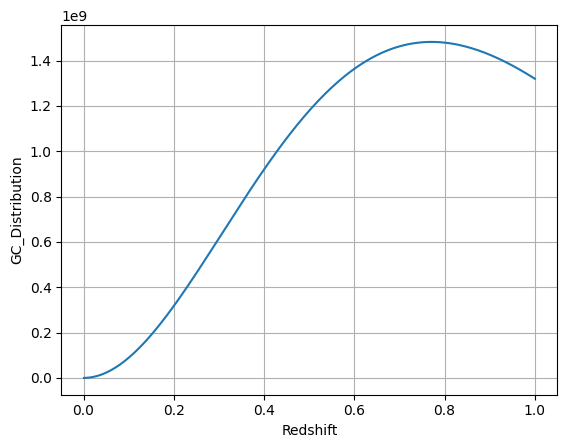

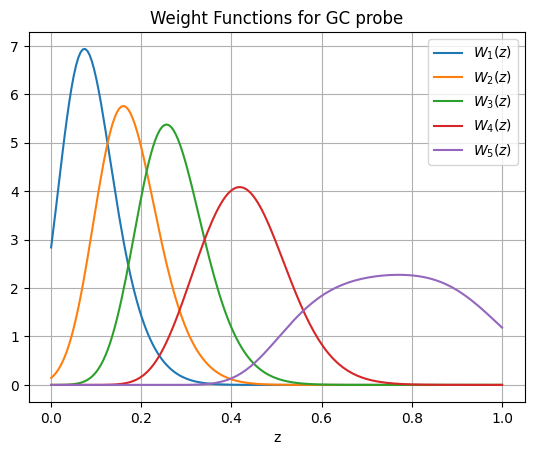

In [31]:
#GC_distribution
data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GC_distribution.dat")
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]

# we transpose the matrix 
file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GC_distribution.dat").T
z_column = file_content[0]
#print(z_column)
gc_distri_column = file_content[1]
#print(gc_distri_column)
# # print(redshift_column)
n = (1.62*10**9/norm_gc)
plt.plot(z_column,gc_distri_column)
plt.xlabel('Redshift')
plt.ylabel('GC_Distribution')
plt.grid()
plt.show()



#eta_GC_z
number_of_arrays = len(euclid_bin_z)-1
#print(number_of_arrays)
z_arrays = [[] for _ in range(number_of_arrays)]
eta_gc_arrays = [[] for _ in range(number_of_arrays)]
#print(z_arrays)


data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_eta_GC_z.dat")
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]

# we transpose the matrix 
file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_eta_GC_z.dat").T
z_column = file_content[0]
#print(z_column)
eta_gc_column = file_content[1]


#-------------z-------------------------------------------------------------------
# print(len(z_column))
# print(int(len(z_column)/(len(euclid_bin_z)-1)))
slicing_points = []
for i in range(len(euclid_bin_z)-1):
    slicing_points.append((i+1)*(int(len(z_column)/(len(euclid_bin_z)-1))))
#print(slicing_points)
small_arrays_z =np.split(z_column,slicing_points)
#print(small_arrays_z[0])

#-------------eta_gc-------------------------------------------------------------------
# print(len(eta_gc_column))
# print(int(len(eta_gc_column)/(len(euclid_bin_z)-1)))
# print(slicing_points)

small_arrays_eta_gc =np.split(eta_gc_column,slicing_points)

#print(small_arrays_eta_gc[0])



for i in range(number_of_arrays):
    plt.plot(small_arrays_z[i],small_arrays_eta_gc[i],label = f'$W_{i+1}(z)$')
plt.grid()   
plt.title('Weight Functions for GC probe')
plt.xlabel('z') 
plt.legend()
plt.show()




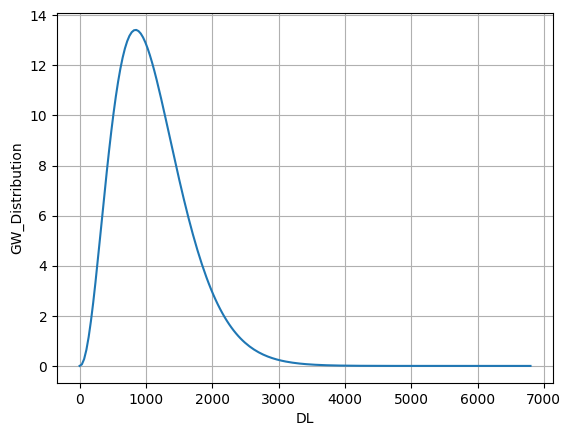

[[], [], [], [], []]
1000
200
[200, 400, 600, 800, 1000]


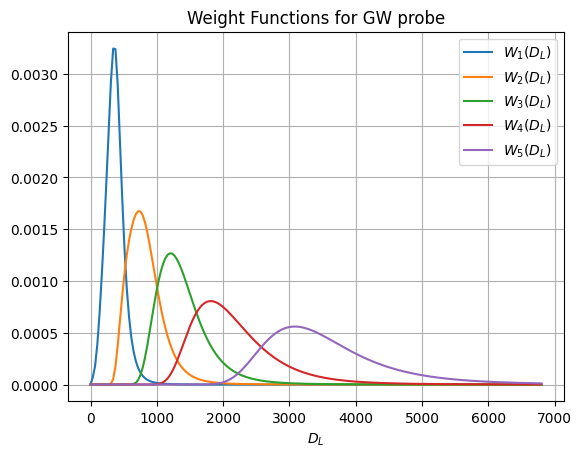

In [32]:
#GW_distribution
data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GW_distribution.dat")
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]

# we transpose the matrix 
file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GW_distribution.dat").T
dl_column = file_content[0]
#print(z_column)
gw_distri_column = file_content[1]
#print(gc_distri_column)
# # print(redshift_column)
plt.plot(dl_column,gw_distri_column)
plt.xlabel('DL')
plt.ylabel('GW_Distribution')
plt.grid()
plt.show()


#eta_GW_d_L
number_of_arrays = len(euclid_bin_d_l)-1
#print(number_of_arrays)
d_L_arrays = [[] for _ in range(number_of_arrays)]
eta_gw_arrays = [[] for _ in range(number_of_arrays)]
print(z_arrays)


data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_eta_d_L.dat")
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]

# we transpose the matrix 
file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_eta_d_L.dat").T
d_L_column = file_content[0]
#print(z_column)
eta_gw_column = file_content[1]


#-------------z-------------------------------------------------------------------
# print(len(z_column))
# print(int(len(z_column)/(len(euclid_bin_z)-1)))
slicing_points = []
for i in range(len(euclid_bin_d_l)-1):
    slicing_points.append((i+1)*(int(len(d_L_column)/(len(euclid_bin_d_l)-1))))
#print(slicing_points)
small_arrays_d_L =np.split(d_L_column,slicing_points)
#print(small_arrays_d_L[0])

#-------------eta_gc-------------------------------------------------------------------
print(len(eta_gw_column))
print(int(len(eta_gw_column)/(len(euclid_bin_d_l)-1)))
print(slicing_points)
small_arrays_eta_gw =np.split(eta_gw_column,slicing_points)
#print(small_arrays_eta_gw[0])

for i in range(number_of_arrays):
    plt.plot(small_arrays_d_L[i],small_arrays_eta_gw[i],label = f'$W_{i+1}(D_L)$')
plt.grid()   
plt.title('Weight Functions for GW probe')
plt.xlabel('$D_L$') 
plt.legend()
plt.show()


In [33]:
# # ---------------------------------------------------------------REWRITE the convolution procedure
# # Fill array of discrete d_L values
#  d_L = np.linspace( d_L_min,  d_L_max, num= n_d_Lmax)

# # Fill distribution for each bin (convolving with GW_error)
# # n_i = int n(z) dz over bin
#  eta_conv_GW_d_L = np.zeros(( n_d_Lmax,  nbin), 'float64')
#  photoerror_conv_GW_d_L = np.zeros(( n_d_Lmax,  nbin), 'float64')
#  array_n_i = []
# for Bin in range(1):
#     for n_d_L in range(3):
#         d_L =  d_L[n_d_L]
#          inter,  int_err = scipy.integrate.quad( GW_distribution* GW_error, d_L_bin_edge[i],  d_L_bin_edge[i+1])
        
# #          array_n_i.append(int)
# #print(d_L)
# # print( array_n_i)  

1000
200
[200, 400, 600, 800, 1000]


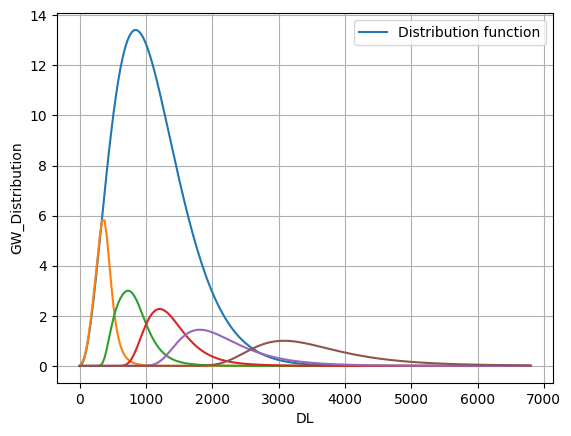

In [34]:
#GW_distribution
data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GW_distribution.dat")
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]

# we transpose the matrix 
file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_GW_distribution.dat").T
dl_column = file_content[0]
#print(z_column)
gw_distri_column = file_content[1]
#print(gc_distri_column)
# # print(redshift_column)
plt.plot(dl_column,gw_distri_column, label= 'Distribution function')
plt.xlabel('DL')
plt.ylabel('GW_Distribution')
plt.grid()
#plt.show()


#eta_GW_d_L
number_of_arrays = len(euclid_bin_d_l)-1
#print(number_of_arrays)
d_L_arrays = [[] for _ in range(number_of_arrays)]
eta_gw_arrays = [[] for _ in range(number_of_arrays)]
#print(z_arrays)


data = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_eta_d_L.dat")
size = np.shape(data)
#print('Size of data set',size)
length_of_data = size[0]

# we transpose the matrix 
file_content = np.loadtxt("/home/kostis/Desktop/convolution_output/dark_sirens_eta_d_L.dat").T
d_L_column = file_content[0]
#print(z_column)
eta_gw_column = file_content[1]


#-------------z-------------------------------------------------------------------
# print(len(z_column))
# print(int(len(z_column)/(len(euclid_bin_z)-1)))
slicing_points = []
for i in range(len(euclid_bin_d_l)-1):
    slicing_points.append((i+1)*(int(len(d_L_column)/(len(euclid_bin_d_l)-1))))
#print(slicing_points)
small_arrays_d_L =np.split(d_L_column,slicing_points)
#print(small_arrays_d_L[0])

#-------------eta_gc-------------------------------------------------------------------
print(len(eta_gw_column))
print(int(len(eta_gw_column)/(len(euclid_bin_d_l)-1)))
print(slicing_points)
small_arrays_eta_gw =np.split(eta_gw_column,slicing_points)
#print(small_arrays_eta_gw[0])

for i in range(number_of_arrays):
    plt.plot(small_arrays_d_L[i],10*small_arrays_eta_gw[i]*(norm_bbh/len(data_bbh_redshifts)))
    
plt.legend()
#plt.xscale('log')
plt.show()

In the upcoming sections, we will develop a concise algorithm designed to read .txt files generated by Cosmic Fish, with a particular focus on the Fisher matrix. This algorithm will facilitate the organization of rows and columns in a manner that aligns with the covariance matrix (covmat) format used in MontePython. Furthermore, we will implement the necessary steps to invert the matrix, rendering it suitable for utilization in our chains.

In [36]:
# Create an empty list to hold the matrix rows
cf_matrix = []
with open('path/to/users/file', 'r') as file:
    for line in file:
        # Skip lines that start with "#" (comments)
        if not line.startswith('#'):
            # Split the line into a list of values and convert them to floats
            row = [float(value) for value in line.split()]
            # Append the row to the master list
            cf_matrix.append(row)





FileNotFoundError: [Errno 2] No such file or directory: '/home/kostis/Desktop/Master_Thesis_ubuntu/santi_cf_files/GCph-Fishers/CosmicFish_v1.0_Euclid-class-GCph-5bz_GCph_fishermatrix.txt'

Now the user needs to find the differences between the order of the two matrices

For our case, rows first:

In [ ]:
cf_matrix[0], cf_matrix[1] = cf_matrix[1], cf_matrix[0]

# Exchange row 3 and 5
cf_matrix[3], cf_matrix[5] = cf_matrix[5], cf_matrix[3]

# Exchange row 3 and 4
cf_matrix[3], cf_matrix[4] = cf_matrix[4], cf_matrix[3]

# Print the outcome
print(cf_matrix)

[[-2781241.8785180817, 39405.505422644404, -134833.44086029177, -151853.95437956622, -94300.16637710232, -336558.10914581176], [197006935.00905403, -2781241.8785180817, 9387886.232667312, 10783207.512986466, 6663500.891319961, 23767406.494535606], [9387886.232667312, -134833.44086029177, 492765.20903826953, 508908.6869096039, 323201.98483953724, 1154031.2637304757], [6663500.891319961, -94300.16637710232, 323201.98483953724, 361085.87097749015, 226475.32523028945, 810093.5227240844], [23767406.494535606, -336558.10914581176, 1154031.2637304757, 1243580.0085750683, 810093.5227240844, 2937127.6892566406], [10783207.512986466, -151853.95437956622, 508908.6869096039, 648148.6077776079, 361085.87097749015, 1243580.0085750683]]


Our case columns,

In [ ]:
# Exchange column 0 and 1
for row in range(len(cf_matrix)):
    cf_matrix[row][0], cf_matrix[row][1] = cf_matrix[row][1], cf_matrix[row][0]

# Exchange column 3 and 5
for row in range(len(cf_matrix)):
    cf_matrix[row][3], cf_matrix[row][5] = cf_matrix[row][5], cf_matrix[row][3]

# Exchange column 3 and 4
for row in range(len(cf_matrix)):
    cf_matrix[row][3], cf_matrix[row][4] = cf_matrix[row][4], cf_matrix[row][3]

# Print the final outcome
for row in cf_matrix:
    print(row)



[-2781241.8785180817, 39405.505422644404, -134833.44086029177, -336558.10914581176, -151853.95437956622, -94300.16637710232]
[197006935.00905403, -2781241.8785180817, 9387886.232667312, 23767406.494535606, 10783207.512986466, 6663500.891319961]
[9387886.232667312, -134833.44086029177, 492765.20903826953, 1154031.2637304757, 508908.6869096039, 323201.98483953724]
[6663500.891319961, -94300.16637710232, 323201.98483953724, 810093.5227240844, 361085.87097749015, 226475.32523028945]
[23767406.494535606, -336558.10914581176, 1154031.2637304757, 2937127.6892566406, 1243580.0085750683, 810093.5227240844]
[10783207.512986466, -151853.95437956622, 508908.6869096039, 1243580.0085750683, 648148.6077776079, 361085.87097749015]


The inverse matrix

In [ ]:
inv_cf_matrix = np.linalg.inv(cf_matrix)
print(inv_cf_matrix)

[[ 3.91854666e-03  8.77224986e-05  3.50351813e-04 -1.23528057e-03
  -1.85590587e-05 -9.26610724e-05]
 [ 1.86441663e-01  3.91854666e-03  1.59129562e-02 -5.39339889e-02
  -2.43767850e-04 -3.49131875e-03]
 [ 1.59129562e-02  3.50351813e-04  1.44410201e-03 -5.11362348e-03
  -2.86936469e-05 -3.30552278e-04]
 [-2.43767850e-04 -1.85590587e-05 -2.86936469e-05 -4.53394811e-04
   1.91216517e-04  1.59890705e-04]
 [-3.49131875e-03 -9.26610724e-05 -3.30552278e-04  8.19112178e-04
   1.59890705e-04  2.21596126e-04]
 [-5.39339889e-02 -1.23528057e-03 -5.11362348e-03  2.15059398e-02
  -4.53394811e-04  8.19112178e-04]]


Now we need to creat an output to add to our ```.txt``` file 

In [ ]:
# Define the header for the file
header = "#          omega_b,        omega_cdm,              n_s,              A_s,                h,        bias_GC_1"
print(header)
# Save the matrix to a file
with open("matrix.txt", "w") as f:
    # Write the header
    f.write(header + "\n")
    # Write each row of the matrix
    for row in inv_cf_matrix:
        row_string = ""
        for element in row:
            row_string += f"{element:.20e}\t"
        # Remove the last tab character and add a newline
        row_string = row_string[:-1] + "\n"
        f.write(row_string)
        # Print the row to the console
        print(row_string, end="")


#          omega_b,        omega_cdm,              n_s,              A_s,                h,        bias_GC_1
3.91854665711980233028e-03	8.77224985637777032212e-05	3.50351812563733306435e-04	-1.23528057324859253351e-03	-1.85590587004676803545e-05	-9.26610724192158735288e-05
1.86441663189927719912e-01	3.91854665711976156428e-03	1.59129561599394321603e-02	-5.39339888695845870448e-02	-2.43767849600886780210e-04	-3.49131875443011623419e-03
1.59129561599405215666e-02	3.50351812563754719428e-04	1.44410200644273702814e-03	-5.11362348453145171973e-03	-2.86936469313143467468e-05	-3.30552278446287310654e-04
-2.43767849597056158410e-04	-1.85590587003792094572e-05	-2.86936469309549066215e-05	-4.53394810875635981360e-04	1.91216516908164268834e-04	1.59890705131564509010e-04
-3.49131875442734935025e-03	-9.26610724191513228419e-05	-3.30552278446005038618e-04	8.19112177709005917677e-04	1.59890705131646556009e-04	2.21596126401685949731e-04
-5.39339888696055216877e-02	-1.23528057324906025832e-03	-5.113623